# Segmentación de clientes y modelos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('base_limpia.xlsx')

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df = df[df['Etiqueta']!= 'Por Definir']

In [5]:
seguimiento = pd.read_excel('base_limpia.xlsx')
seguimiento = seguimiento[seguimiento['Etiqueta']== 'Por Definir']

In [6]:
seguimiento

,Unnamed: 0,Operacion Con Credito,Carta Oferta,Zona,Region Etapa,Rut Cliente,Estado Carta Oferta,Estado Comercial COF,Monto Carta oferta,Monto Reserva,...,N° Grupo Familiar,Tipo Compra,Antiguedad Laboral,Renta Liquida,Rango de Ingresos,Profesion (Estandar),Cargo Estandarizado,Rango de Edad,Etiqueta,Comuna Estandarizada
0,0,Si,212515871,5-ZONA ANTOFAGASTA,ANTOFAGASTA,18010236-1,PPM,Normal,6400.0,7648.0,...,5,Primera Vivienda,1,3500000,3.000.001 y 4.000.000,Otros,Gerente,26-30,Por Definir,II Región de Antofagasta
1,1,Si,212515848,5-ZONA ANTOFAGASTA,ANTOFAGASTA,19104385-5,Con Promesa,Normal,5250.0,62.0,...,2,Primera Vivienda,2,2300000,2.000.001 y 2.500.000,Universitarios,Operario,19-25,Por Definir,II Región de Antofagasta
2,2,No,212516137,5-ZONA ANTOFAGASTA,ANTOFAGASTA,17718590-6,PPM,Normal,78.0,0.0,...,2,Primera Vivienda,1,450000,Hasta 500.000,Otros,Tecnico,26-30,Por Definir,II Región de Antofagasta
3,3,Si,212516126,5-ZONA ANTOFAGASTA,ANTOFAGASTA,17718590-6,PPM,Normal,2400.0,0.0,...,2,Primera Vivienda,1,450000,Hasta 500.000,Otros,Tecnico,26-30,Por Definir,II Región de Antofagasta
4,4,No,212516095,3-ZONA SUR,BIO-BIO,9213925-5,PPM,Normal,50.0,10.0,...,3,Segunda Vivienda,9,3800000,3.000.001 y 4.000.000,Otros,Gerente,56-60,Por Definir,VIII Región del Biobío
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29551,33889,Si,212415942,3-ZONA SUR,METROPOLITANA,15890264-8,Con Promesa,Traspasada,1679.0,5.0,...,2,Primera Vivienda,2,810000,Entre 500.001 y 1.000.000,Universitarios,Administrativo,31-35,Por Definir,Puente Alto
29558,33897,Si,212408378,3-ZONA SUR,METROPOLITANA,13915513-0,Con Promesa,Traspasada,1460.0,10.0,...,2,Vivienda Inversion,3,1000000,Entre 500.001 y 1.000.000,Otros,Docente,41-45,Por Definir,Maipu
29564,33903,Si,212408355,2-ZONA CENTRO,METROPOLITANA,10464464-3,Con Promesa,Traspasada,3571.0,10.0,...,4,Primera Vivienda,2,1500000,1.000.001 y 1.500.000,Otros,Administrativo,51-55,Por Definir,Maipu
29565,33904,Si,212408355,2-ZONA CENTRO,METROPOLITANA,10464464-3,Con Promesa,Traspasada,3571.0,10.0,...,4,Primera Vivienda,2,1500000,1.000.001 y 1.500.000,Otros,Administrativo,51-55,Por Definir,Maipu


In [7]:
df.columns

Index(['Operacion Con Credito', 'Carta Oferta', 'Zona', 'Region Etapa',
       'Rut Cliente', 'Estado Carta Oferta', 'Estado Comercial COF',
       'Monto Carta oferta', 'Monto Reserva', 'Monto Pie',
       'Monto Carta de instruccion', 'Monto Beneficio Minero',
       'Monto CH FFAA y Otros', 'Monto Crédito Complementario',
       'Monto LEASING', 'Monto Vivienda principal', 'Monto CDP',
       'Monto CDP Cheque', 'Monto CH', 'Monto Subsidio', 'Monto Ahorro',
       'Monto BAP', 'Nombre Completo', 'Tipo', 'Nacionalidad Cliente',
       'Estado Civil', 'N° Grupo Familiar', 'Tipo Compra',
       'Antiguedad Laboral', 'Renta Liquida', 'Rango de Ingresos',
       'Profesion (Estandar)', 'Cargo Estandarizado', 'Rango de Edad',
       'Etiqueta', 'Comuna Estandarizada'],
      dtype='object')

In [8]:
columnas_train = ['Operacion Con Credito', 'Zona',  'Monto Carta oferta', 'Monto Reserva', 'Monto Pie',
       'Monto Carta de instruccion', 'Monto Beneficio Minero',
       'Monto CH FFAA y Otros', 'Monto Crédito Complementario',
       'Monto LEASING', 'Monto Vivienda principal', 'Monto CDP',
       'Monto CDP Cheque', 'Monto CH', 'Monto Subsidio', 'Monto Ahorro',
       'Monto BAP', 'Tipo', 'Nacionalidad Cliente',
       'Estado Civil', 'N° Grupo Familiar', 'Tipo Compra',
       'Antiguedad Laboral', 'Renta Liquida', 'Rango de Ingresos',
       'Profesion (Estandar)', 'Cargo Estandarizado', 'Rango de Edad', 'Comuna Estandarizada']

In [9]:
X= df[columnas_train]
y = df['Etiqueta']

In [10]:
categoricas = ['Operacion Con Credito', 'Zona', 'Tipo', 'Nacionalidad Cliente', 'Estado Civil', 'N° Grupo Familiar',
               'Tipo Compra', 'Rango de Ingresos', 'Profesion (Estandar)', 'Cargo Estandarizado', 'Rango de Edad',
               'Comuna Estandarizada']

numericas = ['Monto Reserva', 'Monto Pie','Monto Carta de instruccion', 'Monto Beneficio Minero',
                'Monto CH FFAA y Otros', 'Monto Crédito Complementario',
                'Monto LEASING', 'Monto Vivienda principal', 'Monto CDP',
                'Monto CDP Cheque', 'Monto CH', 'Monto Subsidio', 'Monto Ahorro', 'Monto BAP',]

In [11]:
df_numericas = df[numericas]
df_numericas

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,Monto CH,Monto Subsidio,Monto Ahorro,Monto BAP
95,18.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
103,10.0,4616.13,0.0,0.0,0.0,0.0,0.0,4448.56,0.0,0.0,0.0,0.0,0.0,0.0
132,10.0,90.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
146,3.5,221.50,0.0,0.0,0.0,0.0,0.0,2200.00,0.0,0.0,1650.0,325.0,0.0,0.0
176,0.0,400.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30575,10.0,300.00,0.0,0.0,0.0,0.0,0.0,3156.00,0.0,0.0,2783.0,0.0,0.0,0.0
30576,10.0,1480.00,0.0,0.0,0.0,0.0,0.0,3973.00,0.0,0.0,2324.0,0.0,0.0,0.0
30577,10.0,1481.00,0.0,0.0,0.0,0.0,0.0,5260.00,0.0,0.0,3664.0,0.0,0.0,0.0
30578,10.0,504.00,0.0,0.0,0.0,0.0,0.0,5148.00,0.0,0.0,4634.0,0.0,0.0,0.0


In [12]:
df_categoricas = df[categoricas]
df_categoricas

,Operacion Con Credito,Zona,Tipo,Nacionalidad Cliente,Estado Civil,N° Grupo Familiar,Tipo Compra,Rango de Ingresos,Profesion (Estandar),Cargo Estandarizado,Rango de Edad,Comuna Estandarizada
95,No,2-ZONA CENTRO,Natural,Chilena,Soltero(a),3,Segunda Vivienda,1.000.001 y 1.500.000,Tecnicos,Ejecutivo,36-40,Puente Alto
103,No,3-ZONA SUR,Natural,Chilena,Casado(a),3,Otros,2.500.001 y 3.000.000,Universitarios,Gerente,41-45,VIII Región del Biobío
132,No,1-ZONA NORTE,Natural,Chilena,Soltero(a),2,Primera Vivienda,Entre 500.001 y 1.000.000,Universitarios,Apoyo,26-30,IV Región de Coquimbo
146,Si,1-ZONA NORTE,Natural,Chilena,Soltero(a),2,Primera Vivienda,Entre 500.001 y 1.000.000,Universitarios,Apoyo,26-30,IV Región de Coquimbo
176,No,2-ZONA CENTRO,Natural,Chilena,Soltero(a),3,Vivienda Inversion,1.500.001 y 2.000.000,Tecnicos,Ejecutivo,41-45,San Miguel
...,...,...,...,...,...,...,...,...,...,...,...,...
30575,Si,3-ZONA SUR,Natural,Chilena,Soltero(a),3,Primera Vivienda,Entre 500.001 y 1.000.000,Tecnicos,Administrativo,51-55,VIII Región del Biobío
30576,Si,3-ZONA SUR,Natural,Chilena,Casado(a),2,Primera Vivienda,1.000.001 y 1.500.000,Otros,Jefe,41-45,VIII Región del Biobío
30577,Si,3-ZONA SUR,Natural,Chilena,Soltero(a),6,Primera Vivienda,2.000.001 y 2.500.000,Universitarios,Jefe,31-35,VIII Región del Biobío
30578,Si,3-ZONA SUR,Natural,Chilena,Casado(a),4,Segunda Vivienda,2.500.001 y 3.000.000,Otros,Jefe,51-55,VIII Región del Biobío


In [13]:
df_categoricas = pd.get_dummies(df_categoricas)

In [14]:
df_categoricas

,N° Grupo Familiar,Operacion Con Credito_No,Operacion Con Credito_Si,Zona_1-ZONA NORTE,Zona_2-ZONA CENTRO,Zona_3-ZONA SUR,Zona_4-ZONA VERTICAL,Zona_5-ZONA ANTOFAGASTA,Tipo_Jurídico,Tipo_Natural,...,Comuna Estandarizada_VII Región del Maule,Comuna Estandarizada_VIII Región del Biobío,Comuna Estandarizada_Vitacura,Comuna Estandarizada_X Región de Los Lagos,Comuna Estandarizada_XI Región Aysén del General Carlos Ibáñez del Campo,Comuna Estandarizada_XII Región de Magallanes y de la Antártica Chilena,Comuna Estandarizada_XIV Región de Los Ríos,Comuna Estandarizada_XV Región de Arica y Parinacota,Comuna Estandarizada_XVI Región de Ñuble,Comuna Estandarizada_Ñuñoa
95,3,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
103,3,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
132,2,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
146,2,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
176,3,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30575,3,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
30576,2,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
30577,6,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
30578,4,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [15]:
df_prepro = pd.merge(df_numericas.reset_index(), df_categoricas.reset_index(), on='index', how='left')

In [16]:
df_prepro = df_prepro.drop('index', axis=1)
df_prepro

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,...,Comuna Estandarizada_VII Región del Maule,Comuna Estandarizada_VIII Región del Biobío,Comuna Estandarizada_Vitacura,Comuna Estandarizada_X Región de Los Lagos,Comuna Estandarizada_XI Región Aysén del General Carlos Ibáñez del Campo,Comuna Estandarizada_XII Región de Magallanes y de la Antártica Chilena,Comuna Estandarizada_XIV Región de Los Ríos,Comuna Estandarizada_XV Región de Arica y Parinacota,Comuna Estandarizada_XVI Región de Ñuble,Comuna Estandarizada_Ñuñoa
0,18.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,4616.13,0.0,0.0,0.0,0.0,0.0,4448.56,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,10.0,90.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3.5,221.50,0.0,0.0,0.0,0.0,0.0,2200.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,400.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27529,10.0,300.00,0.0,0.0,0.0,0.0,0.0,3156.00,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
27530,10.0,1480.00,0.0,0.0,0.0,0.0,0.0,3973.00,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
27531,10.0,1481.00,0.0,0.0,0.0,0.0,0.0,5260.00,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
27532,10.0,504.00,0.0,0.0,0.0,0.0,0.0,5148.00,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
X= df_prepro
y = df['Etiqueta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

In [19]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
pred = clf.predict(X_test)
prob = clf.predict_proba(X_test)

In [21]:
np.unique(pred)

array(['Desiste', 'Escritura'], dtype=object)

In [22]:
for i in range(len(pred)):
    print('El cliente ', pred[i], 'con probabilidad', prob[i])

El cliente  Escritura con probabilidad [0.17457678 0.82542322]
El cliente  Escritura con probabilidad [0.28454838 0.71545162]
El cliente  Escritura con probabilidad [0.11830279 0.88169721]
El cliente  Escritura con probabilidad [0.23153613 0.76846387]
El cliente  Escritura con probabilidad [0.1671258 0.8328742]
El cliente  Escritura con probabilidad [0.14267866 0.85732134]
El cliente  Escritura con probabilidad [0.00541635 0.99458365]
El cliente  Escritura con probabilidad [0.13974947 0.86025053]
El cliente  Escritura con probabilidad [0.19380607 0.80619393]
El cliente  Escritura con probabilidad [0.27083697 0.72916303]
El cliente  Escritura con probabilidad [0.03282603 0.96717397]
El cliente  Escritura con probabilidad [0.06554646 0.93445354]
El cliente  Escritura con probabilidad [0.27980351 0.72019649]
El cliente  Escritura con probabilidad [0.09925779 0.90074221]
El cliente  Escritura con probabilidad [0.00862931 0.99137069]
El cliente  Escritura con probabilidad [0.4329968 0.56700

El cliente  Escritura con probabilidad [1.61577136e-07 9.99999838e-01]
El cliente  Escritura con probabilidad [1.03288892e-05 9.99989671e-01]
El cliente  Escritura con probabilidad [0.17706344 0.82293656]
El cliente  Escritura con probabilidad [0.18195397 0.81804603]
El cliente  Escritura con probabilidad [0.16814276 0.83185724]
El cliente  Escritura con probabilidad [0.29832385 0.70167615]
El cliente  Escritura con probabilidad [0.16177369 0.83822631]
El cliente  Escritura con probabilidad [7.23498228e-06 9.99992765e-01]
El cliente  Escritura con probabilidad [0.16309168 0.83690832]
El cliente  Escritura con probabilidad [2.59529378e-08 9.99999974e-01]
El cliente  Escritura con probabilidad [0.00510713 0.99489287]
El cliente  Escritura con probabilidad [0.16872661 0.83127339]
El cliente  Escritura con probabilidad [0.29233269 0.70766731]
El cliente  Escritura con probabilidad [0.05447491 0.94552509]
El cliente  Escritura con probabilidad [0.08451336 0.91548664]
El cliente  Escritura c

El cliente  Escritura con probabilidad [0.13014997 0.86985003]
El cliente  Escritura con probabilidad [0.05618823 0.94381177]
El cliente  Escritura con probabilidad [0.27722847 0.72277153]
El cliente  Escritura con probabilidad [8.58669871e-04 9.99141330e-01]
El cliente  Escritura con probabilidad [0.23131686 0.76868314]
El cliente  Escritura con probabilidad [0.23218961 0.76781039]
El cliente  Escritura con probabilidad [0.16546144 0.83453856]
El cliente  Escritura con probabilidad [2.57685811e-05 9.99974231e-01]
El cliente  Escritura con probabilidad [0.16472734 0.83527266]
El cliente  Escritura con probabilidad [0.00465314 0.99534686]
El cliente  Escritura con probabilidad [0.01632145 0.98367855]
El cliente  Escritura con probabilidad [0.18631141 0.81368859]
El cliente  Escritura con probabilidad [3.59230066e-08 9.99999964e-01]
El cliente  Escritura con probabilidad [0.14209449 0.85790551]
El cliente  Escritura con probabilidad [0.21505465 0.78494535]
El cliente  Escritura con proba

El cliente  Escritura con probabilidad [2.50981138e-08 9.99999975e-01]
El cliente  Escritura con probabilidad [0.17539344 0.82460656]
El cliente  Escritura con probabilidad [0.19167638 0.80832362]
El cliente  Escritura con probabilidad [3.99648137e-09 9.99999996e-01]
El cliente  Escritura con probabilidad [0.44676562 0.55323438]
El cliente  Escritura con probabilidad [0.06225323 0.93774677]
El cliente  Escritura con probabilidad [3.20865987e-07 9.99999679e-01]
El cliente  Escritura con probabilidad [0.13990344 0.86009656]
El cliente  Escritura con probabilidad [8.68475236e-09 9.99999991e-01]
El cliente  Escritura con probabilidad [1.24181621e-09 9.99999999e-01]
El cliente  Escritura con probabilidad [0.20438052 0.79561948]
El cliente  Escritura con probabilidad [0.24827249 0.75172751]
El cliente  Escritura con probabilidad [3.7341108e-10 1.0000000e+00]
El cliente  Escritura con probabilidad [0.00637897 0.99362103]
El cliente  Escritura con probabilidad [0.21708057 0.78291943]
El client

El cliente  Escritura con probabilidad [0.47380258 0.52619742]
El cliente  Escritura con probabilidad [0.22066175 0.77933825]
El cliente  Escritura con probabilidad [0.0933558 0.9066442]
El cliente  Escritura con probabilidad [0.1123765 0.8876235]
El cliente  Escritura con probabilidad [0.15536239 0.84463761]
El cliente  Escritura con probabilidad [0.21262171 0.78737829]
El cliente  Escritura con probabilidad [0.03006923 0.96993077]
El cliente  Escritura con probabilidad [8.88487794e-04 9.99111512e-01]
El cliente  Escritura con probabilidad [0.01570771 0.98429229]
El cliente  Escritura con probabilidad [0.08433371 0.91566629]
El cliente  Escritura con probabilidad [1.67941554e-04 9.99832058e-01]
El cliente  Escritura con probabilidad [0.02297847 0.97702153]
El cliente  Escritura con probabilidad [0.21680691 0.78319309]
El cliente  Escritura con probabilidad [0.21109469 0.78890531]
El cliente  Escritura con probabilidad [0.20723063 0.79276937]
El cliente  Escritura con probabilidad [0.2

El cliente  Escritura con probabilidad [0.22384329 0.77615671]
El cliente  Escritura con probabilidad [0.11995552 0.88004448]
El cliente  Escritura con probabilidad [0.16682333 0.83317667]
El cliente  Escritura con probabilidad [0.08855105 0.91144895]
El cliente  Escritura con probabilidad [0.27589406 0.72410594]
El cliente  Escritura con probabilidad [0.03307079 0.96692921]
El cliente  Escritura con probabilidad [0.155453 0.844547]
El cliente  Escritura con probabilidad [0.22899792 0.77100208]
El cliente  Escritura con probabilidad [0.10690855 0.89309145]
El cliente  Escritura con probabilidad [0.16493329 0.83506671]
El cliente  Escritura con probabilidad [0.2663769 0.7336231]
El cliente  Escritura con probabilidad [1.36779477e-13 1.00000000e+00]
El cliente  Escritura con probabilidad [0.15224858 0.84775142]
El cliente  Escritura con probabilidad [0.2079232 0.7920768]
El cliente  Escritura con probabilidad [4.70433516e-04 9.99529566e-01]
El cliente  Escritura con probabilidad [5.56007

El cliente  Escritura con probabilidad [1.31796796e-11 1.00000000e+00]
El cliente  Escritura con probabilidad [1.82227972e-05 9.99981777e-01]
El cliente  Escritura con probabilidad [5.46835774e-06 9.99994532e-01]
El cliente  Escritura con probabilidad [0.30173222 0.69826778]
El cliente  Escritura con probabilidad [0.00749486 0.99250514]
El cliente  Escritura con probabilidad [0.19782753 0.80217247]
El cliente  Escritura con probabilidad [0.01136916 0.98863084]
El cliente  Escritura con probabilidad [0.21578527 0.78421473]
El cliente  Escritura con probabilidad [0.28546777 0.71453223]
El cliente  Escritura con probabilidad [0.20446773 0.79553227]
El cliente  Escritura con probabilidad [0.03732589 0.96267411]
El cliente  Escritura con probabilidad [0.10926738 0.89073262]
El cliente  Escritura con probabilidad [0.19739956 0.80260044]
El cliente  Escritura con probabilidad [0.17591758 0.82408242]
El cliente  Escritura con probabilidad [2.05216602e-07 9.99999795e-01]
El cliente  Escritura c

El cliente  Escritura con probabilidad [0.04393329 0.95606671]
El cliente  Escritura con probabilidad [0.04028495 0.95971505]
El cliente  Escritura con probabilidad [2.42455252e-04 9.99757545e-01]
El cliente  Escritura con probabilidad [0.41724503 0.58275497]
El cliente  Escritura con probabilidad [0.04251312 0.95748688]
El cliente  Escritura con probabilidad [0.15384183 0.84615817]
El cliente  Escritura con probabilidad [0.16980314 0.83019686]
El cliente  Escritura con probabilidad [0.09243794 0.90756206]
El cliente  Escritura con probabilidad [0.01205889 0.98794111]
El cliente  Escritura con probabilidad [0.17319235 0.82680765]
El cliente  Escritura con probabilidad [8.63276117e-11 1.00000000e+00]
El cliente  Escritura con probabilidad [0.1200947 0.8799053]
El cliente  Escritura con probabilidad [1.13176334e-08 9.99999989e-01]
El cliente  Escritura con probabilidad [0.08609037 0.91390963]
El cliente  Escritura con probabilidad [0.08350252 0.91649748]
El cliente  Escritura con probabi

El cliente  Escritura con probabilidad [0.2241479 0.7758521]
El cliente  Escritura con probabilidad [0.08170997 0.91829003]
El cliente  Escritura con probabilidad [0.1444617 0.8555383]
El cliente  Escritura con probabilidad [1.37945031e-06 9.99998621e-01]
El cliente  Escritura con probabilidad [0.14111157 0.85888843]
El cliente  Escritura con probabilidad [0.08959884 0.91040116]
El cliente  Escritura con probabilidad [0.04062696 0.95937304]
El cliente  Escritura con probabilidad [0.24688861 0.75311139]
El cliente  Escritura con probabilidad [0.02074037 0.97925963]
El cliente  Escritura con probabilidad [0.06880591 0.93119409]
El cliente  Escritura con probabilidad [1.34031162e-08 9.99999987e-01]
El cliente  Escritura con probabilidad [0.01646401 0.98353599]
El cliente  Escritura con probabilidad [0.02103246 0.97896754]
El cliente  Escritura con probabilidad [4.52847801e-08 9.99999955e-01]
El cliente  Escritura con probabilidad [0.11105762 0.88894238]
El cliente  Escritura con probabili

El cliente  Escritura con probabilidad [0.09863544 0.90136456]
El cliente  Escritura con probabilidad [0.06458146 0.93541854]
El cliente  Escritura con probabilidad [0.08243877 0.91756123]
El cliente  Escritura con probabilidad [0.04596265 0.95403735]
El cliente  Escritura con probabilidad [0.24842089 0.75157911]
El cliente  Escritura con probabilidad [0.02214301 0.97785699]
El cliente  Escritura con probabilidad [2.13979350e-07 9.99999786e-01]
El cliente  Escritura con probabilidad [0.01909306 0.98090694]
El cliente  Escritura con probabilidad [0.17201525 0.82798475]
El cliente  Escritura con probabilidad [0.21484182 0.78515818]
El cliente  Escritura con probabilidad [0.15086527 0.84913473]
El cliente  Escritura con probabilidad [0.14408337 0.85591663]
El cliente  Escritura con probabilidad [0.29298162 0.70701838]
El cliente  Escritura con probabilidad [0.17964968 0.82035032]
El cliente  Escritura con probabilidad [0.03989594 0.96010406]
El cliente  Escritura con probabilidad [4.49832

El cliente  Escritura con probabilidad [1.13228213e-07 9.99999887e-01]
El cliente  Escritura con probabilidad [0.11158281 0.88841719]
El cliente  Escritura con probabilidad [0.05234051 0.94765949]
El cliente  Escritura con probabilidad [0.16292184 0.83707816]
El cliente  Escritura con probabilidad [0.09821979 0.90178021]
El cliente  Escritura con probabilidad [1.66291588e-06 9.99998337e-01]
El cliente  Escritura con probabilidad [0.15146209 0.84853791]
El cliente  Escritura con probabilidad [3.82378573e-11 1.00000000e+00]
El cliente  Escritura con probabilidad [0.03937365 0.96062635]
El cliente  Escritura con probabilidad [0.02246138 0.97753862]
El cliente  Escritura con probabilidad [0.29068518 0.70931482]
El cliente  Escritura con probabilidad [0.25381134 0.74618866]
El cliente  Escritura con probabilidad [0.00472585 0.99527415]
El cliente  Escritura con probabilidad [0.00159727 0.99840273]
El cliente  Escritura con probabilidad [0.15979219 0.84020781]
El cliente  Escritura con proba

El cliente  Escritura con probabilidad [0.17781929 0.82218071]
El cliente  Escritura con probabilidad [0.03027359 0.96972641]
El cliente  Escritura con probabilidad [0.12010253 0.87989747]
El cliente  Escritura con probabilidad [0.16953118 0.83046882]
El cliente  Escritura con probabilidad [7.48616724e-11 1.00000000e+00]
El cliente  Escritura con probabilidad [0.2196741 0.7803259]
El cliente  Escritura con probabilidad [0.23875905 0.76124095]
El cliente  Escritura con probabilidad [0.17705349 0.82294651]
El cliente  Escritura con probabilidad [0.0801688 0.9198312]
El cliente  Escritura con probabilidad [0.21639598 0.78360402]
El cliente  Escritura con probabilidad [2.01516143e-07 9.99999798e-01]
El cliente  Escritura con probabilidad [0.24492359 0.75507641]
El cliente  Escritura con probabilidad [0.43108928 0.56891072]
El cliente  Escritura con probabilidad [0.20479362 0.79520638]
El cliente  Escritura con probabilidad [0.22160867 0.77839133]
El cliente  Escritura con probabilidad [0.0

El cliente  Escritura con probabilidad [0.26916153 0.73083847]
El cliente  Escritura con probabilidad [0.23880343 0.76119657]
El cliente  Escritura con probabilidad [0.0228091 0.9771909]
El cliente  Escritura con probabilidad [0.01870415 0.98129585]
El cliente  Escritura con probabilidad [0.08337105 0.91662895]
El cliente  Escritura con probabilidad [0.06870079 0.93129921]
El cliente  Escritura con probabilidad [0.08815 0.91185]
El cliente  Escritura con probabilidad [0.09104333 0.90895667]
El cliente  Escritura con probabilidad [1.70549201e-05 9.99982945e-01]
El cliente  Escritura con probabilidad [0.04825824 0.95174176]
El cliente  Escritura con probabilidad [0.01857054 0.98142946]
El cliente  Escritura con probabilidad [0.02274809 0.97725191]
El cliente  Escritura con probabilidad [0.20229342 0.79770658]
El cliente  Escritura con probabilidad [0.17458789 0.82541211]
El cliente  Escritura con probabilidad [0.07342695 0.92657305]
El cliente  Escritura con probabilidad [0.22311948 0.77

El cliente  Escritura con probabilidad [0.13738878 0.86261122]
El cliente  Escritura con probabilidad [0.29680129 0.70319871]
El cliente  Escritura con probabilidad [0.18213268 0.81786732]
El cliente  Escritura con probabilidad [0.03456005 0.96543995]
El cliente  Escritura con probabilidad [0.22038241 0.77961759]
El cliente  Escritura con probabilidad [0.07435639 0.92564361]
El cliente  Escritura con probabilidad [0.2000245 0.7999755]
El cliente  Escritura con probabilidad [0.2323399 0.7676601]
El cliente  Escritura con probabilidad [0.3890381 0.6109619]
El cliente  Escritura con probabilidad [0.13956003 0.86043997]
El cliente  Escritura con probabilidad [0.03146924 0.96853076]
El cliente  Escritura con probabilidad [0.17125985 0.82874015]
El cliente  Escritura con probabilidad [0.21487411 0.78512589]
El cliente  Escritura con probabilidad [0.10263155 0.89736845]
El cliente  Escritura con probabilidad [0.25983133 0.74016867]
El cliente  Escritura con probabilidad [0.27126596 0.72873404

El cliente  Escritura con probabilidad [0.20025384 0.79974616]
El cliente  Escritura con probabilidad [0.02927502 0.97072498]
El cliente  Escritura con probabilidad [0.17838608 0.82161392]
El cliente  Escritura con probabilidad [0.03273233 0.96726767]
El cliente  Escritura con probabilidad [3.80559617e-07 9.99999619e-01]
El cliente  Escritura con probabilidad [0.19689189 0.80310811]
El cliente  Escritura con probabilidad [0.14387143 0.85612857]
El cliente  Escritura con probabilidad [0.00295998 0.99704002]
El cliente  Escritura con probabilidad [1.81595006e-09 9.99999998e-01]
El cliente  Escritura con probabilidad [0.28250606 0.71749394]
El cliente  Escritura con probabilidad [0.14762855 0.85237145]
El cliente  Escritura con probabilidad [0.16297944 0.83702056]
El cliente  Escritura con probabilidad [0.28835567 0.71164433]
El cliente  Escritura con probabilidad [0.17391944 0.82608056]
El cliente  Escritura con probabilidad [0.00495292 0.99504708]
El cliente  Escritura con probabilidad 

El cliente  Escritura con probabilidad [0.16660692 0.83339308]
El cliente  Escritura con probabilidad [0.09606533 0.90393467]
El cliente  Escritura con probabilidad [0.24844595 0.75155405]
El cliente  Escritura con probabilidad [0.05501412 0.94498588]
El cliente  Escritura con probabilidad [0.19396822 0.80603178]
El cliente  Escritura con probabilidad [0.07382334 0.92617666]
El cliente  Escritura con probabilidad [0.10638818 0.89361182]
El cliente  Escritura con probabilidad [0.02092886 0.97907114]
El cliente  Escritura con probabilidad [0.05907737 0.94092263]
El cliente  Escritura con probabilidad [0.02568285 0.97431715]
El cliente  Escritura con probabilidad [0.05367998 0.94632002]
El cliente  Escritura con probabilidad [0.25875865 0.74124135]
El cliente  Escritura con probabilidad [0.23706213 0.76293787]
El cliente  Escritura con probabilidad [0.05035929 0.94964071]
El cliente  Escritura con probabilidad [0.19850291 0.80149709]
El cliente  Escritura con probabilidad [0.32248452 0.67

El cliente  Escritura con probabilidad [0.04436192 0.95563808]
El cliente  Escritura con probabilidad [0.08109278 0.91890722]
El cliente  Escritura con probabilidad [0.10044956 0.89955044]
El cliente  Escritura con probabilidad [0.14786378 0.85213622]
El cliente  Escritura con probabilidad [0.24245903 0.75754097]
El cliente  Escritura con probabilidad [0.17805798 0.82194202]
El cliente  Escritura con probabilidad [0.08158314 0.91841686]
El cliente  Escritura con probabilidad [0.10486573 0.89513427]
El cliente  Escritura con probabilidad [0.14640586 0.85359414]
El cliente  Escritura con probabilidad [0.22284733 0.77715267]
El cliente  Escritura con probabilidad [0.02366008 0.97633992]
El cliente  Escritura con probabilidad [0.21200252 0.78799748]
El cliente  Escritura con probabilidad [0.10173234 0.89826766]
El cliente  Escritura con probabilidad [0.0614458 0.9385542]
El cliente  Escritura con probabilidad [0.11363748 0.88636252]
El cliente  Escritura con probabilidad [0.26219848 0.7378

El cliente  Escritura con probabilidad [0.05866065 0.94133935]
El cliente  Escritura con probabilidad [0.00128072 0.99871928]
El cliente  Escritura con probabilidad [3.119988e-05 9.999688e-01]
El cliente  Escritura con probabilidad [0.06054529 0.93945471]
El cliente  Escritura con probabilidad [0.24650207 0.75349793]
El cliente  Escritura con probabilidad [3.27189742e-09 9.99999997e-01]
El cliente  Escritura con probabilidad [0.02601095 0.97398905]
El cliente  Escritura con probabilidad [0.26187481 0.73812519]
El cliente  Escritura con probabilidad [0.23006891 0.76993109]
El cliente  Escritura con probabilidad [0.15879413 0.84120587]
El cliente  Escritura con probabilidad [0.02767885 0.97232115]
El cliente  Escritura con probabilidad [0.00968318 0.99031682]
El cliente  Escritura con probabilidad [0.25090412 0.74909588]
El cliente  Escritura con probabilidad [0. 1.]
El cliente  Escritura con probabilidad [0.23960687 0.76039313]
El cliente  Escritura con probabilidad [0.02032609 0.979673

El cliente  Escritura con probabilidad [0.09025389 0.90974611]
El cliente  Escritura con probabilidad [0.03809651 0.96190349]
El cliente  Escritura con probabilidad [0.22826293 0.77173707]
El cliente  Escritura con probabilidad [5.43668599e-09 9.99999995e-01]
El cliente  Escritura con probabilidad [0.18102347 0.81897653]
El cliente  Escritura con probabilidad [1.44034679e-04 9.99855965e-01]
El cliente  Escritura con probabilidad [1.56699869e-06 9.99998433e-01]
El cliente  Escritura con probabilidad [0.3208188 0.6791812]
El cliente  Escritura con probabilidad [0.07272128 0.92727872]
El cliente  Escritura con probabilidad [1.1558754e-11 1.0000000e+00]
El cliente  Escritura con probabilidad [0.13033468 0.86966532]
El cliente  Escritura con probabilidad [0.01521513 0.98478487]
El cliente  Escritura con probabilidad [0.18517195 0.81482805]
El cliente  Escritura con probabilidad [6.25165808e-06 9.99993748e-01]
El cliente  Escritura con probabilidad [0.25452398 0.74547602]
El cliente  Escritu

El cliente  Escritura con probabilidad [0.17665717 0.82334283]
El cliente  Escritura con probabilidad [0.28071232 0.71928768]
El cliente  Escritura con probabilidad [0.02319189 0.97680811]
El cliente  Escritura con probabilidad [9.48362501e-07 9.99999052e-01]
El cliente  Escritura con probabilidad [1.90103784e-05 9.99980990e-01]
El cliente  Escritura con probabilidad [0.02338293 0.97661707]
El cliente  Escritura con probabilidad [0. 1.]
El cliente  Escritura con probabilidad [0.27259948 0.72740052]
El cliente  Escritura con probabilidad [0.22577368 0.77422632]
El cliente  Escritura con probabilidad [0.01480803 0.98519197]
El cliente  Escritura con probabilidad [0.26528204 0.73471796]
El cliente  Escritura con probabilidad [0.22513887 0.77486113]
El cliente  Escritura con probabilidad [0.08461442 0.91538558]
El cliente  Escritura con probabilidad [0.15047241 0.84952759]
El cliente  Escritura con probabilidad [0.43304833 0.56695167]
El cliente  Escritura con probabilidad [0.01598574 0.98

El cliente  Escritura con probabilidad [0.20218404 0.79781596]
El cliente  Escritura con probabilidad [0.19003533 0.80996467]
El cliente  Escritura con probabilidad [0.03073968 0.96926032]
El cliente  Escritura con probabilidad [0.19885037 0.80114963]
El cliente  Escritura con probabilidad [0.15995942 0.84004058]
El cliente  Escritura con probabilidad [0.10983857 0.89016143]
El cliente  Escritura con probabilidad [1.25487042e-08 9.99999987e-01]
El cliente  Escritura con probabilidad [0.08074428 0.91925572]
El cliente  Escritura con probabilidad [0.06098808 0.93901192]
El cliente  Escritura con probabilidad [0.28168766 0.71831234]
El cliente  Escritura con probabilidad [0.0081006 0.9918994]
El cliente  Escritura con probabilidad [4.39426273e-13 1.00000000e+00]
El cliente  Escritura con probabilidad [0.05141655 0.94858345]
El cliente  Escritura con probabilidad [0.22150548 0.77849452]
El cliente  Escritura con probabilidad [0.14909655 0.85090345]
El cliente  Escritura con probabilidad [0

In [23]:

from sklearn.cluster import KMeans

In [24]:
# implementación de la regla del codo
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_prepro).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow

,Number of Clusters,Score
0,5,6.229345e+10
1,10,2.810436e+10
2,20,1.294974e+10
3,30,8.195074e+09
4,50,5.014940e+09
5,75,3.392737e+09
6,100,2.584891e+09
7,200,1.386856e+09
8,300,9.551588e+08


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

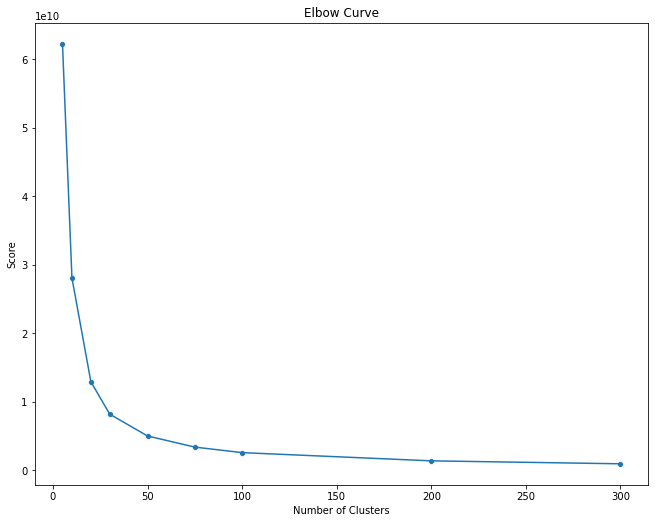

In [25]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(df_prepro)

KMeans(n_clusters=5)

In [27]:
centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

centroids_df = pd.DataFrame(centroids, columns=list(df_prepro.columns))

centroids_df = pd.DataFrame(centroids, columns=list(df_prepro.columns))
df_prepro["cluster"] = clusters
df_prepro["cluster"] = df_prepro["cluster"].astype('category')

In [28]:
df_prepro = pd.merge(df_prepro.reset_index(), pd.DataFrame(df['Etiqueta']).reset_index(), on = 'index', how='left')

In [29]:
df_prepro=df_prepro.dropna().reset_index(drop=True)

# Funciones para perfilar clientes

In [30]:
def get_columns(grupo, columna):
    serie=df_prepro[df_prepro['cluster']==grupo]
    col=[]
    for i in range(serie.shape[1]):
        if columna in serie.columns[i]:
            col.append(serie.columns[i])
    return col        
    

In [31]:
def top_3(grupo, etiqueta, columna):
    serie = df_prepro[(df_prepro['Etiqueta']==etiqueta) & (df_prepro['cluster'] == grupo)]
    df = pd.DataFrame(columns = [columna, 'frecuencia'])
    frec = serie[get_columns(grupo, columna)].sum().tolist()
    df.loc[:, columna] = get_columns(grupo, columna)
    df.loc[:, 'frecuencia'] = frec
    return df.sort_values(by='frecuencia', ascending = False)[:5]

In [32]:
def prom_montos(grupo, etiqueta, columna):
    serie = df_prepro[(df_prepro['Etiqueta']==etiqueta) & (df_prepro['cluster'] == grupo)]
    df = pd.DataFrame(columns = [columna, 'Promedio (UF)'])
    frec = serie[get_columns(grupo, columna)].mean().tolist()
    df.loc[:, columna] = get_columns(grupo,columna)
    df.loc[:, 'Promedio (UF)'] = frec
    return df

In [33]:
def montar_df(grupo, columna):
    aux = df_prepro[df_prepro['cluster'] == grupo]
    
    esc = top_3(grupo, 'Escritura', columna)
    des = top_3(grupo, 'Desiste', columna)
    
    dataframes = [des, esc]
    result = pd.concat(dataframes, sort='False', keys=['Desiste', 'Escritura'])
    return result

In [34]:
def grupo_fam(grupo):
    esc = df_prepro[(df_prepro['Etiqueta']=='Escritura') & (df_prepro['cluster']==grupo)]
    des = df_prepro[(df_prepro['Etiqueta']=='Desiste') & (df_prepro['cluster']==grupo)]
    
    df_esc = pd.DataFrame(columns = ['Moda N° Grupo Familiar'])
    df_des = pd.DataFrame(columns = ['Moda N° Grupo Familiar'])
    
    df_esc.loc[0, ['Moda N° Grupo Familiar']] = esc['N° Grupo Familiar'].mode()[0]
    df_des.loc[0, ['Moda N° Grupo Familiar']] = des['N° Grupo Familiar'].mode()[0]
    
    dataframes = [df_des, df_esc]
    result = pd.concat(dataframes, sort='False', keys=['Desiste', 'Escritura'])
    return result
    

**Columnas**

In [35]:
for i in range(df_prepro.shape[1]):
    print(i, ')', df_prepro.columns[i])

0 ) index
1 ) Monto Reserva
2 ) Monto Pie
3 ) Monto Carta de instruccion
4 ) Monto Beneficio Minero
5 ) Monto CH FFAA y Otros
6 ) Monto Crédito Complementario
7 ) Monto LEASING
8 ) Monto Vivienda principal
9 ) Monto CDP
10 ) Monto CDP Cheque
11 ) Monto CH
12 ) Monto Subsidio
13 ) Monto Ahorro
14 ) Monto BAP
15 ) N° Grupo Familiar
16 ) Operacion Con Credito_No
17 ) Operacion Con Credito_Si
18 ) Zona_1-ZONA NORTE
19 ) Zona_2-ZONA CENTRO
20 ) Zona_3-ZONA SUR
21 ) Zona_4-ZONA VERTICAL
22 ) Zona_5-ZONA ANTOFAGASTA
23 ) Tipo_Jurídico
24 ) Tipo_Natural
25 ) Nacionalidad Cliente_Alemana
26 ) Nacionalidad Cliente_Argentina
27 ) Nacionalidad Cliente_Boliviana
28 ) Nacionalidad Cliente_Brasileña
29 ) Nacionalidad Cliente_Chilena
30 ) Nacionalidad Cliente_China
31 ) Nacionalidad Cliente_Colombiana
32 ) Nacionalidad Cliente_Cubana
33 ) Nacionalidad Cliente_Ecuatoriana
34 ) Nacionalidad Cliente_Española
35 ) Nacionalidad Cliente_Extranjera
36 ) Nacionalidad Cliente_Italiana
37 ) Nacionalidad Cliente

# Grupos

Para efectos de la segmentación de clientes, se han considerado a priori 5 grupos de clientes, de los cuales se mostrarán atributos numéricos como los montos, atributos categoricos, como el top comunas, top cargos y profesiones, entre otras

# Grupo 0

## Resumen de Montos

In [36]:
df_prepro[df_prepro['cluster']==0].groupby(['Etiqueta']).mean()[get_columns(0,'Monto')]

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,Monto CH,Monto Subsidio,Monto Ahorro,Monto BAP
Etiqueta,,,,,,,,,,,,,,
Desiste,83.601000,1235.805267,1007.068200,0.0,0.000000,0.00000,0.0000,4552.691200,27.680000,7.823733,29.372000,0.0,0.0,11.986667
Escritura,52.038377,352.038491,40.175222,0.0,5.859993,9.63438,2.8779,4487.133159,23.239787,1.694744,11.210399,0.0,0.0,19.458309


## Rango de Edad

In [37]:
montar_df(0, 'Rango de Edad')

Rango de Edad  frecuencia
Desiste   4  Rango de Edad_41-45          30
          3  Rango de Edad_36-40          23
          5  Rango de Edad_46-50          20
          7  Rango de Edad_56-60          19
          8  Rango de Edad_61-65          18
Escritura 4  Rango de Edad_41-45         641
          3  Rango de Edad_36-40         480
          5  Rango de Edad_46-50         426
          6  Rango de Edad_51-55         372
          7  Rango de Edad_56-60         271

## Nacionalidad

In [38]:
montar_df(0, 'Nacionalidad')

Nacionalidad  frecuencia
Desiste   4      Nacionalidad Cliente_Chilena         141
          10  Nacionalidad Cliente_Extranjera           5
          16  Nacionalidad Cliente_Venezolana           2
          9     Nacionalidad Cliente_Española           1
          11    Nacionalidad Cliente_Italiana           1
Escritura 4      Nacionalidad Cliente_Chilena        2854
          10  Nacionalidad Cliente_Extranjera          44
          1    Nacionalidad Cliente_Argentina           4
          13     Nacionalidad Cliente_Peruana           3
          9     Nacionalidad Cliente_Española           2

## Estado Civil y N° Grupo Familiar

In [39]:
montar_df(0, 'Estado Civil')

Estado Civil  frecuencia
Desiste   0      Estado Civil_Casado(a)          77
          3     Estado Civil_Soltero(a)          59
          1  Estado Civil_Divorciado(a)           5
          2    Estado Civil_Separado(a)           5
          5       Estado Civil_Viudo(a)           4
Escritura 0      Estado Civil_Casado(a)        1699
          3     Estado Civil_Soltero(a)        1040
          2    Estado Civil_Separado(a)         101
          5       Estado Civil_Viudo(a)          44
          1  Estado Civil_Divorciado(a)          25

In [40]:
grupo_fam(0)

,,Moda N° Grupo Familiar
Desiste,0,2
Escritura,0,2


## Tipo Compra

In [41]:
montar_df(0, 'Tipo Compra')

Tipo Compra  frecuencia
Desiste   1    Tipo Compra_Primera Vivienda          63
          2    Tipo Compra_Segunda Vivienda          58
          3  Tipo Compra_Vivienda Inversion          23
          0               Tipo Compra_Otros           6
Escritura 1    Tipo Compra_Primera Vivienda        1450
          2    Tipo Compra_Segunda Vivienda        1077
          3  Tipo Compra_Vivienda Inversion         301
          0               Tipo Compra_Otros          81

## Profesión y Cargo

In [42]:
montar_df(0, 'Profesion')

Profesion  frecuencia
Desiste   2            Profesion (Estandar)_Otros         109
          4   Profesion (Estandar)_Universitarios          25
          3         Profesion (Estandar)_Tecnicos          14
          1   Profesion (Estandar)_Independientes           2
          0  Profesion (Estandar)_Fuerzas Armadas           0
Escritura 2            Profesion (Estandar)_Otros        2257
          4   Profesion (Estandar)_Universitarios         452
          3         Profesion (Estandar)_Tecnicos         175
          1   Profesion (Estandar)_Independientes          14
          0  Profesion (Estandar)_Fuerzas Armadas          11

In [43]:
montar_df(0, 'Cargo')

Cargo  frecuencia
Desiste   6          Cargo Estandarizado_Gerente          46
          9             Cargo Estandarizado_Jefe          42
          7    Cargo Estandarizado_Independiente          19
          13      Cargo Estandarizado_Supervisor          15
          0   Cargo Estandarizado_Administrativo          13
Escritura 9             Cargo Estandarizado_Jefe        1068
          6          Cargo Estandarizado_Gerente         817
          13      Cargo Estandarizado_Supervisor         329
          0   Cargo Estandarizado_Administrativo         297
          14         Cargo Estandarizado_Tecnico         147

## Rango de Ingresos y Comuna

In [44]:
montar_df(0, 'Rango de Ingresos')

Rango de Ingresos  frecuencia
Desiste   1  Rango de Ingresos_1.500.001 y 2.000.000          26
          4  Rango de Ingresos_2.500.001 y 3.000.000          26
          0  Rango de Ingresos_1.000.001 y 1.500.000          25
          3  Rango de Ingresos_2.000.001 y 2.500.000          21
          5  Rango de Ingresos_3.000.001 y 4.000.000          21
Escritura 0  Rango de Ingresos_1.000.001 y 1.500.000         620
          1  Rango de Ingresos_1.500.001 y 2.000.000         599
          3  Rango de Ingresos_2.000.001 y 2.500.000         393
          4  Rango de Ingresos_2.500.001 y 3.000.000         389
          5  Rango de Ingresos_3.000.001 y 4.000.000         369

In [45]:
montar_df(0, 'Comuna')

Comuna  frecuencia
Desiste   25                Comuna Estandarizada_Las Condes          16
          13  Comuna Estandarizada_II Región de Antofagasta          16
          51                  Comuna Estandarizada_Santiago          12
          54    Comuna Estandarizada_V Región de Valparaíso          10
          40               Comuna Estandarizada_Puente Alto           9
Escritura 13  Comuna Estandarizada_II Región de Antofagasta         353
          25                Comuna Estandarizada_Las Condes         332
          54    Comuna Estandarizada_V Región de Valparaíso         247
          51                  Comuna Estandarizada_Santiago         203
          40               Comuna Estandarizada_Puente Alto         198

# Grupo 1

## Resumen de Montos

In [46]:
df_prepro[df_prepro['cluster']==1].groupby(['Etiqueta']).mean()[get_columns(1,'Monto')]

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,Monto CH,Monto Subsidio,Monto Ahorro,Monto BAP
Etiqueta,,,,,,,,,,,,,,
Desiste,59.019867,789.788987,0.907067,5.253333,12.000000,1.063467,0.0,5069.580107,3.232267,17.590507,3954.788240,0.000000,0.0,1.013600
Escritura,63.226737,777.525351,3.475690,10.440380,6.291945,3.937783,0.0,5128.571626,1.644710,23.167845,3940.270862,0.818368,0.0,2.476562


## Rango de Edad

In [47]:
montar_df(1, 'Rango de Edad')

Rango de Edad  frecuencia
Desiste   3  Rango de Edad_36-40          85
          4  Rango de Edad_41-45          80
          2  Rango de Edad_31-35          71
          5  Rango de Edad_46-50          35
          1  Rango de Edad_26-30          31
Escritura 3  Rango de Edad_36-40         462
          4  Rango de Edad_41-45         432
          2  Rango de Edad_31-35         401
          5  Rango de Edad_46-50         202
          6  Rango de Edad_51-55         162

## Nacionalidad

In [48]:
montar_df(1, 'Nacionalidad')

Nacionalidad  frecuencia
Desiste   4       Nacionalidad Cliente_Chilena         351
          16   Nacionalidad Cliente_Venezolana           8
          10   Nacionalidad Cliente_Extranjera           3
          1     Nacionalidad Cliente_Argentina           3
          8   Nacionalidad Cliente_Ecuatoriana           3
Escritura 4       Nacionalidad Cliente_Chilena        1842
          10   Nacionalidad Cliente_Extranjera          26
          16   Nacionalidad Cliente_Venezolana          24
          1     Nacionalidad Cliente_Argentina          17
          6    Nacionalidad Cliente_Colombiana          12

## Estado Civil y N° Grupo Familiar

In [49]:
montar_df(1, 'Estado Civil')

Estado Civil  frecuencia
Desiste   0      Estado Civil_Casado(a)         178
          3     Estado Civil_Soltero(a)         173
          1  Estado Civil_Divorciado(a)          16
          2    Estado Civil_Separado(a)           5
          5       Estado Civil_Viudo(a)           2
Escritura 3     Estado Civil_Soltero(a)         939
          0      Estado Civil_Casado(a)         907
          1  Estado Civil_Divorciado(a)          64
          2    Estado Civil_Separado(a)          31
          5       Estado Civil_Viudo(a)           7

In [50]:
grupo_fam(1)

,,Moda N° Grupo Familiar
Desiste,0,2
Escritura,0,2


## Tipo Compra

In [51]:
montar_df(1, 'Tipo Compra')

Tipo Compra  frecuencia
Desiste   1    Tipo Compra_Primera Vivienda         196
          2    Tipo Compra_Segunda Vivienda         130
          3  Tipo Compra_Vivienda Inversion          30
          0               Tipo Compra_Otros          19
Escritura 1    Tipo Compra_Primera Vivienda         981
          2    Tipo Compra_Segunda Vivienda         707
          3  Tipo Compra_Vivienda Inversion         189
          0               Tipo Compra_Otros          72

## Profesión y Cargo

In [52]:
montar_df(1, 'Profesion')

Profesion  frecuencia
Desiste   2            Profesion (Estandar)_Otros         242
          4   Profesion (Estandar)_Universitarios          92
          3         Profesion (Estandar)_Tecnicos          32
          0  Profesion (Estandar)_Fuerzas Armadas           5
          1   Profesion (Estandar)_Independientes           4
Escritura 2            Profesion (Estandar)_Otros        1342
          4   Profesion (Estandar)_Universitarios         455
          3         Profesion (Estandar)_Tecnicos         129
          1   Profesion (Estandar)_Independientes          14
          0  Profesion (Estandar)_Fuerzas Armadas           9

In [53]:
montar_df(1, 'Cargo')

Cargo  frecuencia
Desiste   6         Cargo Estandarizado_Gerente         115
          9            Cargo Estandarizado_Jefe          69
          7   Cargo Estandarizado_Independiente          62
          0  Cargo Estandarizado_Administrativo          26
          8       Cargo Estandarizado_Ingeniero          19
Escritura 6         Cargo Estandarizado_Gerente         510
          7   Cargo Estandarizado_Independiente         381
          9            Cargo Estandarizado_Jefe         331
          8       Cargo Estandarizado_Ingeniero         122
          0  Cargo Estandarizado_Administrativo         115

## Rango de Ingresos y Comuna

In [54]:
montar_df(1, 'Rango de Ingresos')

Rango de Ingresos  frecuencia
Desiste   1  Rango de Ingresos_1.500.001 y 2.000.000          92
          0  Rango de Ingresos_1.000.001 y 1.500.000          65
          3  Rango de Ingresos_2.000.001 y 2.500.000          53
          4  Rango de Ingresos_2.500.001 y 3.000.000          53
          5  Rango de Ingresos_3.000.001 y 4.000.000          49
Escritura 1  Rango de Ingresos_1.500.001 y 2.000.000         506
          0  Rango de Ingresos_1.000.001 y 1.500.000         339
          3  Rango de Ingresos_2.000.001 y 2.500.000         295
          4  Rango de Ingresos_2.500.001 y 3.000.000         265
          5  Rango de Ingresos_3.000.001 y 4.000.000         221

In [55]:
montar_df(1, 'Comuna')

Comuna  frecuencia
Desiste   13  Comuna Estandarizada_II Región de Antofagasta          66
          40               Comuna Estandarizada_Puente Alto          36
          54    Comuna Estandarizada_V Región de Valparaíso          31
          57    Comuna Estandarizada_VIII Región del Biobío          31
          30                     Comuna Estandarizada_Maipu          24
Escritura 13  Comuna Estandarizada_II Región de Antofagasta         374
          40               Comuna Estandarizada_Puente Alto         187
          51                  Comuna Estandarizada_Santiago         136
          25                Comuna Estandarizada_Las Condes         132
          57    Comuna Estandarizada_VIII Región del Biobío         121

# Grupo 2

## Resumen de Montos

In [56]:
df_prepro[df_prepro['cluster']==2].groupby(['Etiqueta']).mean()[get_columns(2,'Monto')]

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,Monto CH,Monto Subsidio,Monto Ahorro,Monto BAP
Etiqueta,,,,,,,,,,,,,,
Desiste,138.106061,2494.629697,302.930303,0.0,0.0,13.745455,0.0,13109.739394,0.0,29.000000,7489.894242,0.0,0.0,0.00000
Escritura,127.566337,1977.310535,370.883868,0.0,0.0,76.464609,0.0,14110.176379,0.0,28.789342,4286.981564,0.0,0.0,1.87358


## Rango de Edad

In [57]:
montar_df(2, 'Rango de Edad')

Rango de Edad  frecuencia
Desiste   6  Rango de Edad_51-55           7
          3  Rango de Edad_36-40           6
          4  Rango de Edad_41-45           6
          7  Rango de Edad_56-60           4
          8  Rango de Edad_61-65           4
Escritura 3  Rango de Edad_36-40          55
          6  Rango de Edad_51-55          40
          4  Rango de Edad_41-45          34
          7  Rango de Edad_56-60          28
          8  Rango de Edad_61-65          27

## Nacionalidad

In [58]:
montar_df(2, 'Nacionalidad')

Nacionalidad  frecuencia
Desiste   4      Nacionalidad Cliente_Chilena          31
          10  Nacionalidad Cliente_Extranjera           1
          3    Nacionalidad Cliente_Brasileña           1
          0      Nacionalidad Cliente_Alemana           0
          15    Nacionalidad Cliente_Uruguaya           0
Escritura 4      Nacionalidad Cliente_Chilena         220
          10  Nacionalidad Cliente_Extranjera          13
          1    Nacionalidad Cliente_Argentina           3
          16  Nacionalidad Cliente_Venezolana           2
          15    Nacionalidad Cliente_Uruguaya           2

## Estado Civil y N° Grupo Familiar

In [59]:
montar_df(2, 'Estado Civil')

Estado Civil  frecuencia
Desiste   0      Estado Civil_Casado(a)          24
          3     Estado Civil_Soltero(a)           5
          1  Estado Civil_Divorciado(a)           2
          2    Estado Civil_Separado(a)           2
          4    Estado Civil_Unión Civil           0
Escritura 0      Estado Civil_Casado(a)         187
          3     Estado Civil_Soltero(a)          44
          2    Estado Civil_Separado(a)           5
          1  Estado Civil_Divorciado(a)           4
          5       Estado Civil_Viudo(a)           3

In [60]:
grupo_fam(2)

,,Moda N° Grupo Familiar
Desiste,0,2
Escritura,0,2


## Tipo Compra

In [61]:
montar_df(2, 'Tipo Compra')

Tipo Compra  frecuencia
Desiste   1    Tipo Compra_Primera Vivienda          20
          2    Tipo Compra_Segunda Vivienda          10
          3  Tipo Compra_Vivienda Inversion           3
          0               Tipo Compra_Otros           0
Escritura 1    Tipo Compra_Primera Vivienda         111
          2    Tipo Compra_Segunda Vivienda         102
          0               Tipo Compra_Otros          22
          3  Tipo Compra_Vivienda Inversion           8

## Profesión y Cargo

In [62]:
montar_df(2, 'Profesion')

Profesion  frecuencia
Desiste   2            Profesion (Estandar)_Otros          24
          4   Profesion (Estandar)_Universitarios           9
          0  Profesion (Estandar)_Fuerzas Armadas           0
          1   Profesion (Estandar)_Independientes           0
          3         Profesion (Estandar)_Tecnicos           0
Escritura 2            Profesion (Estandar)_Otros         175
          4   Profesion (Estandar)_Universitarios          66
          1   Profesion (Estandar)_Independientes           1
          3         Profesion (Estandar)_Tecnicos           1
          0  Profesion (Estandar)_Fuerzas Armadas           0

In [63]:
montar_df(2, 'Cargo')

Cargo  frecuencia
Desiste   6          Cargo Estandarizado_Gerente          23
          9             Cargo Estandarizado_Jefe           5
          13      Cargo Estandarizado_Supervisor           2
          2            Cargo Estandarizado_Apoyo           1
          7    Cargo Estandarizado_Independiente           1
Escritura 6          Cargo Estandarizado_Gerente         187
          9             Cargo Estandarizado_Jefe          21
          7    Cargo Estandarizado_Independiente          14
          0   Cargo Estandarizado_Administrativo           5
          2            Cargo Estandarizado_Apoyo           3

## Rango de Ingresos y Comuna

In [64]:
montar_df(2, 'Rango de Ingresos')

Rango de Ingresos  frecuencia
Desiste   6  Rango de Ingresos_4.000.001 y 6.000.000          10
          5  Rango de Ingresos_3.000.001 y 4.000.000           7
          7  Rango de Ingresos_6.000.001 y 8.000.000           7
          4  Rango de Ingresos_2.500.001 y 3.000.000           3
          1  Rango de Ingresos_1.500.001 y 2.000.000           2
Escritura 6  Rango de Ingresos_4.000.001 y 6.000.000         108
          5  Rango de Ingresos_3.000.001 y 4.000.000          49
          4  Rango de Ingresos_2.500.001 y 3.000.000          23
          7  Rango de Ingresos_6.000.001 y 8.000.000          20
          3  Rango de Ingresos_2.000.001 y 2.500.000          12

In [65]:
montar_df(2, 'Comuna')

Comuna  frecuencia
Desiste   25                Comuna Estandarizada_Las Condes          11
          58                  Comuna Estandarizada_Vitacura           5
          65                     Comuna Estandarizada_Ñuñoa           4
          13  Comuna Estandarizada_II Región de Antofagasta           3
          26              Comuna Estandarizada_Lo Barnechea           2
Escritura 25                Comuna Estandarizada_Las Condes          99
          38               Comuna Estandarizada_Providencia          31
          26              Comuna Estandarizada_Lo Barnechea          26
          58                  Comuna Estandarizada_Vitacura          14
          5                     Comuna Estandarizada_Colina          10

# Grupo 3

## Resumen de Montos

In [66]:
df_prepro[df_prepro['cluster']==3].groupby(['Etiqueta']).mean()[get_columns(3,'Monto')]

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,Monto CH,Monto Subsidio,Monto Ahorro,Monto BAP
Etiqueta,,,,,,,,,,,,,,
Desiste,25.031859,328.666390,0.045126,1.901399,1.842960,22.193457,0.0,2474.020912,2.632906,4.094756,1958.027094,50.660397,9.167464,2.505596
Escritura,29.553189,339.947784,0.215777,3.994751,1.708438,12.648856,0.0,2456.700387,2.212272,3.600448,1977.082973,27.254022,6.358129,4.063402


## Rango de Edad

In [67]:
montar_df(3, 'Rango de Edad')

Rango de Edad  frecuencia
Desiste   2  Rango de Edad_31-35         279
          1  Rango de Edad_26-30         194
          3  Rango de Edad_36-40         187
          4  Rango de Edad_41-45         171
          5  Rango de Edad_46-50          84
Escritura 2  Rango de Edad_31-35        1165
          4  Rango de Edad_41-45         890
          3  Rango de Edad_36-40         887
          1  Rango de Edad_26-30         651
          5  Rango de Edad_46-50         473

## Nacionalidad

In [68]:
montar_df(3, 'Nacionalidad')

Nacionalidad  frecuencia
Desiste   4      Nacionalidad Cliente_Chilena        1084
          16  Nacionalidad Cliente_Venezolana           9
          13     Nacionalidad Cliente_Peruana           5
          10  Nacionalidad Cliente_Extranjera           4
          1    Nacionalidad Cliente_Argentina           3
Escritura 4      Nacionalidad Cliente_Chilena        4884
          16  Nacionalidad Cliente_Venezolana          29
          10  Nacionalidad Cliente_Extranjera          23
          6   Nacionalidad Cliente_Colombiana          13
          1    Nacionalidad Cliente_Argentina          12

## Estado Civil y N° Grupo Familiar

In [69]:
montar_df(3, 'Estado Civil')

Estado Civil  frecuencia
Desiste   3     Estado Civil_Soltero(a)         684
          0      Estado Civil_Casado(a)         348
          1  Estado Civil_Divorciado(a)          51
          2    Estado Civil_Separado(a)          14
          5       Estado Civil_Viudo(a)           7
Escritura 3     Estado Civil_Soltero(a)        3085
          0      Estado Civil_Casado(a)        1622
          1  Estado Civil_Divorciado(a)         190
          2    Estado Civil_Separado(a)          55
          5       Estado Civil_Viudo(a)          24

In [70]:
grupo_fam(3)

,,Moda N° Grupo Familiar
Desiste,0,2
Escritura,0,2


## Tipo Compra

In [71]:
montar_df(3, 'Tipo Compra')

Tipo Compra  frecuencia
Desiste   1    Tipo Compra_Primera Vivienda         762
          2    Tipo Compra_Segunda Vivienda         183
          3  Tipo Compra_Vivienda Inversion         122
          0               Tipo Compra_Otros          41
Escritura 1    Tipo Compra_Primera Vivienda        3333
          2    Tipo Compra_Segunda Vivienda         865
          3  Tipo Compra_Vivienda Inversion         635
          0               Tipo Compra_Otros         149

## Profesión y Cargo

In [72]:
montar_df(3, 'Profesion')

Profesion  frecuencia
Desiste   2            Profesion (Estandar)_Otros         767
          4   Profesion (Estandar)_Universitarios         232
          3         Profesion (Estandar)_Tecnicos         103
          1   Profesion (Estandar)_Independientes           4
          0  Profesion (Estandar)_Fuerzas Armadas           2
Escritura 2            Profesion (Estandar)_Otros        3410
          4   Profesion (Estandar)_Universitarios        1075
          3         Profesion (Estandar)_Tecnicos         443
          1   Profesion (Estandar)_Independientes          33
          0  Profesion (Estandar)_Fuerzas Armadas          21

In [73]:
montar_df(3, 'Cargo')

Cargo  frecuencia
Desiste   0   Cargo Estandarizado_Administrativo         231
          9             Cargo Estandarizado_Jefe         132
          3          Cargo Estandarizado_Docente         105
          6          Cargo Estandarizado_Gerente         102
          14         Cargo Estandarizado_Tecnico          91
Escritura 0   Cargo Estandarizado_Administrativo         978
          9             Cargo Estandarizado_Jefe         751
          6          Cargo Estandarizado_Gerente         452
          14         Cargo Estandarizado_Tecnico         398
          7    Cargo Estandarizado_Independiente         391

## Rango de Ingresos y Comuna

In [74]:
montar_df(3, 'Rango de Ingresos')

Rango de Ingresos  frecuencia
Desiste   9  Rango de Ingresos_Entre 500.001 y 1.000.000         470
          0      Rango de Ingresos_1.000.001 y 1.500.000         303
          1      Rango de Ingresos_1.500.001 y 2.000.000         135
          3      Rango de Ingresos_2.000.001 y 2.500.000          47
          4      Rango de Ingresos_2.500.001 y 3.000.000          44
Escritura 9  Rango de Ingresos_Entre 500.001 y 1.000.000        1744
          0      Rango de Ingresos_1.000.001 y 1.500.000        1634
          1      Rango de Ingresos_1.500.001 y 2.000.000         696
          3      Rango de Ingresos_2.000.001 y 2.500.000         230
          4      Rango de Ingresos_2.500.001 y 3.000.000         213

In [75]:
montar_df(3, 'Comuna')

Comuna  frecuencia
Desiste   57    Comuna Estandarizada_VIII Región del Biobío         228
          40               Comuna Estandarizada_Puente Alto         109
          13  Comuna Estandarizada_II Región de Antofagasta          97
          59     Comuna Estandarizada_X Región de Los Lagos          78
          15     Comuna Estandarizada_IV Región de Coquimbo          76
Escritura 57    Comuna Estandarizada_VIII Región del Biobío        1003
          13  Comuna Estandarizada_II Región de Antofagasta         514
          40               Comuna Estandarizada_Puente Alto         438
          59     Comuna Estandarizada_X Región de Los Lagos         356
          54    Comuna Estandarizada_V Región de Valparaíso         303

# Grupo 4

## Resumen de Montos

In [76]:
df_prepro[df_prepro['cluster']==4].groupby(['Etiqueta']).mean()[get_columns(4,'Monto')]

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,Monto CH,Monto Subsidio,Monto Ahorro,Monto BAP
Etiqueta,,,,,,,,,,,,,,
Desiste,38.970816,203.732513,11.598703,0.000000,3.413168,22.487032,3.585561,1566.778623,8.696070,0.0,223.359332,80.192139,9.876497,12.757353
Escritura,22.046071,58.180700,3.335364,0.165098,4.434527,10.243570,1.455924,1788.156279,11.920187,0.0,94.698270,30.539049,3.140174,26.459056


## Rango de Edad

In [77]:
montar_df(4, 'Rango de Edad')

Rango de Edad  frecuencia
Desiste   4  Rango de Edad_41-45         162
          3  Rango de Edad_36-40         140
          2  Rango de Edad_31-35         109
          5  Rango de Edad_46-50          86
          6  Rango de Edad_51-55          66
Escritura 4  Rango de Edad_41-45        2980
          3  Rango de Edad_36-40        2275
          2  Rango de Edad_31-35        1569
          5  Rango de Edad_46-50        1474
          6  Rango de Edad_51-55        1135

## Nacionalidad

In [78]:
montar_df(4, 'Nacionalidad')

Nacionalidad  frecuencia
Desiste   4      Nacionalidad Cliente_Chilena         737
          10  Nacionalidad Cliente_Extranjera           4
          1    Nacionalidad Cliente_Argentina           2
          13     Nacionalidad Cliente_Peruana           2
          0      Nacionalidad Cliente_Alemana           1
Escritura 4      Nacionalidad Cliente_Chilena       12050
          10  Nacionalidad Cliente_Extranjera          40
          1    Nacionalidad Cliente_Argentina           8
          6   Nacionalidad Cliente_Colombiana           4
          13     Nacionalidad Cliente_Peruana           3

## Estado Civil y N° Grupo Familiar

In [79]:
montar_df(4, 'Estado Civil')

Estado Civil  frecuencia
Desiste   3     Estado Civil_Soltero(a)         451
          0      Estado Civil_Casado(a)         256
          1  Estado Civil_Divorciado(a)          18
          2    Estado Civil_Separado(a)          14
          5       Estado Civil_Viudo(a)           9
Escritura 3     Estado Civil_Soltero(a)        6980
          0      Estado Civil_Casado(a)        4556
          2    Estado Civil_Separado(a)         375
          5       Estado Civil_Viudo(a)         119
          1  Estado Civil_Divorciado(a)          80

In [80]:
grupo_fam(4)

,,Moda N° Grupo Familiar
Desiste,0,2
Escritura,0,2


## Tipo Compra

In [81]:
montar_df(4, 'Tipo Compra')

Tipo Compra  frecuencia
Desiste   1    Tipo Compra_Primera Vivienda         543
          2    Tipo Compra_Segunda Vivienda         115
          3  Tipo Compra_Vivienda Inversion          73
          0               Tipo Compra_Otros          17
Escritura 1    Tipo Compra_Primera Vivienda        8508
          2    Tipo Compra_Segunda Vivienda        2107
          3  Tipo Compra_Vivienda Inversion        1250
          0               Tipo Compra_Otros         249

## Profesión y Cargo

In [82]:
montar_df(4, 'Profesion')

Profesion  frecuencia
Desiste   2            Profesion (Estandar)_Otros         514
          4   Profesion (Estandar)_Universitarios         129
          3         Profesion (Estandar)_Tecnicos          95
          1   Profesion (Estandar)_Independientes           7
          0  Profesion (Estandar)_Fuerzas Armadas           3
Escritura 2            Profesion (Estandar)_Otros        9096
          4   Profesion (Estandar)_Universitarios        1700
          3         Profesion (Estandar)_Tecnicos        1242
          0  Profesion (Estandar)_Fuerzas Armadas          39
          1   Profesion (Estandar)_Independientes          37

In [83]:
montar_df(4, 'Cargo')

Cargo  frecuencia
Desiste   0   Cargo Estandarizado_Administrativo         278
          9             Cargo Estandarizado_Jefe         102
          6          Cargo Estandarizado_Gerente          71
          13      Cargo Estandarizado_Supervisor          70
          14         Cargo Estandarizado_Tecnico          65
Escritura 0   Cargo Estandarizado_Administrativo        4242
          9             Cargo Estandarizado_Jefe        2586
          13      Cargo Estandarizado_Supervisor        1468
          14         Cargo Estandarizado_Tecnico        1455
          6          Cargo Estandarizado_Gerente        1162

## Rango de Ingresos y Comuna

In [84]:
montar_df(4, 'Rango de Ingresos')

Rango de Ingresos  frecuencia
Desiste   9   Rango de Ingresos_Entre 500.001 y 1.000.000         339
          10              Rango de Ingresos_Hasta 500.000         131
          0       Rango de Ingresos_1.000.001 y 1.500.000         121
          4       Rango de Ingresos_2.500.001 y 3.000.000          45
          1       Rango de Ingresos_1.500.001 y 2.000.000          42
Escritura 9   Rango de Ingresos_Entre 500.001 y 1.000.000        5197
          0       Rango de Ingresos_1.000.001 y 1.500.000        2532
          10              Rango de Ingresos_Hasta 500.000        1611
          1       Rango de Ingresos_1.500.001 y 2.000.000         931
          4       Rango de Ingresos_2.500.001 y 3.000.000         675

In [85]:
montar_df(4, 'Comuna')

Comuna  frecuencia
Desiste   57     Comuna Estandarizada_VIII Región del Biobío         126
          16  Comuna Estandarizada_IX Región de la Araucanía          79
          13   Comuna Estandarizada_II Región de Antofagasta          66
          54     Comuna Estandarizada_V Región de Valparaíso          59
          40                Comuna Estandarizada_Puente Alto          51
Escritura 13   Comuna Estandarizada_II Región de Antofagasta        1410
          54     Comuna Estandarizada_V Región de Valparaíso        1070
          57     Comuna Estandarizada_VIII Región del Biobío        1004
          51                   Comuna Estandarizada_Santiago         952
          40                Comuna Estandarizada_Puente Alto         931

# Normalización de variables numéricas

In [86]:
%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [87]:
df_prepro = df_prepro.drop('index', axis=1)

In [88]:
df_corr = df_prepro.corr()

In [89]:
for i in df_prepro.columns:
    print(i)

Monto Reserva
Monto Pie
Monto Carta de instruccion
Monto Beneficio Minero
Monto CH FFAA y Otros
Monto Crédito Complementario
Monto LEASING
Monto Vivienda principal
Monto CDP
Monto CDP Cheque
Monto CH
Monto Subsidio
Monto Ahorro
Monto BAP
N° Grupo Familiar
Operacion Con Credito_No
Operacion Con Credito_Si
Zona_1-ZONA NORTE
Zona_2-ZONA CENTRO
Zona_3-ZONA SUR
Zona_4-ZONA VERTICAL
Zona_5-ZONA ANTOFAGASTA
Tipo_Jurídico
Tipo_Natural
Nacionalidad Cliente_Alemana
Nacionalidad Cliente_Argentina
Nacionalidad Cliente_Boliviana
Nacionalidad Cliente_Brasileña
Nacionalidad Cliente_Chilena
Nacionalidad Cliente_China
Nacionalidad Cliente_Colombiana
Nacionalidad Cliente_Cubana
Nacionalidad Cliente_Ecuatoriana
Nacionalidad Cliente_Española
Nacionalidad Cliente_Extranjera
Nacionalidad Cliente_Italiana
Nacionalidad Cliente_Paraguaya
Nacionalidad Cliente_Peruana
Nacionalidad Cliente_Salvadoreña
Nacionalidad Cliente_Uruguaya
Nacionalidad Cliente_Venezolana
Estado Civil_Casado(a)
Estado Civil_Divorciado(a)
E

In [90]:
df_num =  df_prepro[get_columns(0, 'Monto')]
df_num

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,Monto CH,Monto Subsidio,Monto Ahorro,Monto BAP
0,10.00,349.88,0.00,0.0,0.0,0.0,0.0,3317.23,0.0,0.0,3238.85,0.0,0.0,0.0
1,3.48,36.52,0.00,0.0,0.0,0.0,0.0,1662.11,0.0,0.0,910.00,450.0,0.0,0.0
2,0.00,234.58,0.00,0.0,0.0,0.0,0.0,2108.01,0.0,0.0,2091.60,0.0,0.0,0.0
3,0.00,232.09,2088.81,0.0,0.0,0.0,0.0,2718.95,0.0,0.0,0.00,0.0,0.0,0.0
4,3.50,76.50,0.00,0.0,0.0,0.0,0.0,2065.91,0.0,0.0,1350.62,325.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24606,10.00,300.00,0.00,0.0,0.0,0.0,0.0,3156.00,0.0,0.0,2783.00,0.0,0.0,0.0
24607,10.00,1480.00,0.00,0.0,0.0,0.0,0.0,3973.00,0.0,0.0,2324.00,0.0,0.0,0.0
24608,10.00,1481.00,0.00,0.0,0.0,0.0,0.0,5260.00,0.0,0.0,3664.00,0.0,0.0,0.0
24609,10.00,504.00,0.00,0.0,0.0,0.0,0.0,5148.00,0.0,0.0,4634.00,0.0,0.0,0.0


**Dividimos la data**

In [91]:
X_esc = df_prepro[df_prepro['Etiqueta'] == 'Escritura']
y_esc = X_esc['Etiqueta'] #df_prepro[df_prepro['Etiqueta'] == 'Escritura']['Etiqueta']
X_des = df_prepro[df_prepro['Etiqueta'] == 'Desiste']
y_des = X_des['Etiqueta'] #df_prepro[df_prepro['Etiqueta'] == 'Desiste']['Etiqueta']

X_train_esc, X_test_esc, y_train_esc, y_test_esc = train_test_split(X_esc, y_esc, test_size=0.2, random_state=42)
X_train_des, X_test_des, y_train_des, y_test_des = train_test_split(X_des, y_des, test_size=0.2, random_state=42)

In [92]:
X_train_1 = pd.concat([X_train_esc, X_train_des])
X_test_1 = pd.concat([X_test_esc, X_test_des])

X_train = pd.concat([X_train_esc, X_train_des]).drop(['Etiqueta'], axis=1)
X_test = pd.concat([X_test_esc, X_test_des]).drop(['Etiqueta'], axis=1)

y_train = pd.concat([y_train_esc, y_train_des])
y_test = pd.concat([y_test_esc, y_test_des])

Escritura 22197
Desiste 2414


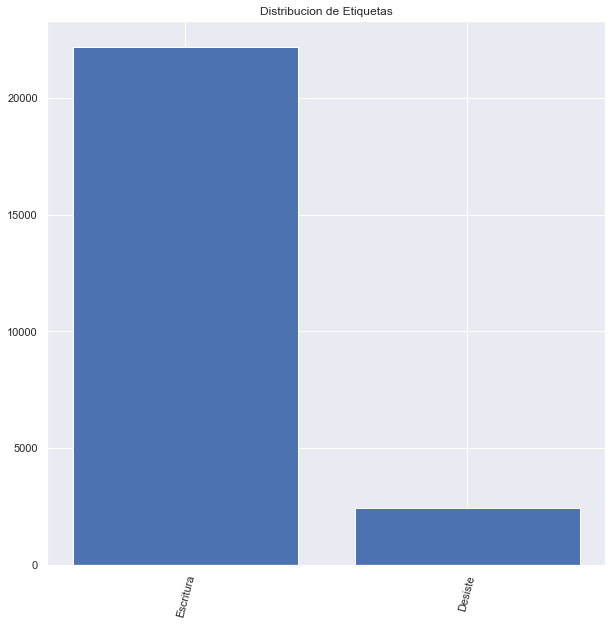

In [93]:
dic_etiq= dict()

for i in range(df_prepro.shape[0]):
    if str(df_prepro['Etiqueta'][i]) not in list(dic_etiq.keys()):
        dic_etiq[str(df_prepro['Etiqueta'][i])] =1
    else:
        dic_etiq[str(df_prepro['Etiqueta'][i])] += 1

        
df_etiqueta = pd.DataFrame(columns= ['Etiqueta', 'frecuencia'])

for i in range(len(dic_etiq)):
    df_etiqueta.loc[i] = [list(dic_etiq.keys())[i], list(dic_etiq.values())[i]]

plt.figure(figsize=(10,10))

plt.bar(df_etiqueta['Etiqueta'],df_etiqueta['frecuencia'])
plt.xticks(rotation=75)
plt.title('Distribucion de Etiquetas')

print('Escritura', len(df_prepro[df_prepro['Etiqueta']== 'Escritura']))
print('Desiste', len(df_prepro[df_prepro['Etiqueta']== 'Desiste']))

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
numeric_features = get_columns(0, 'Monto')

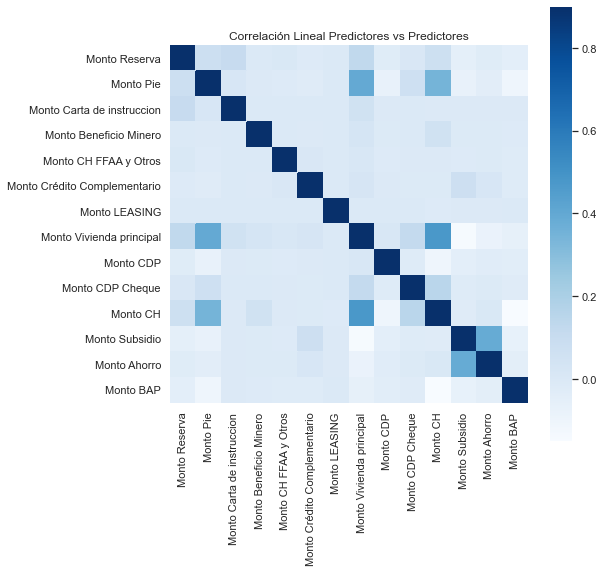

In [96]:
n_show = min(len(numeric_features),25)

corrmat = df_prepro[numeric_features[:n_show]].corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.9, square=True, ax=ax,cmap="Blues")
ax.set_title("Correlación Lineal Predictores vs Predictores")
plt.show()

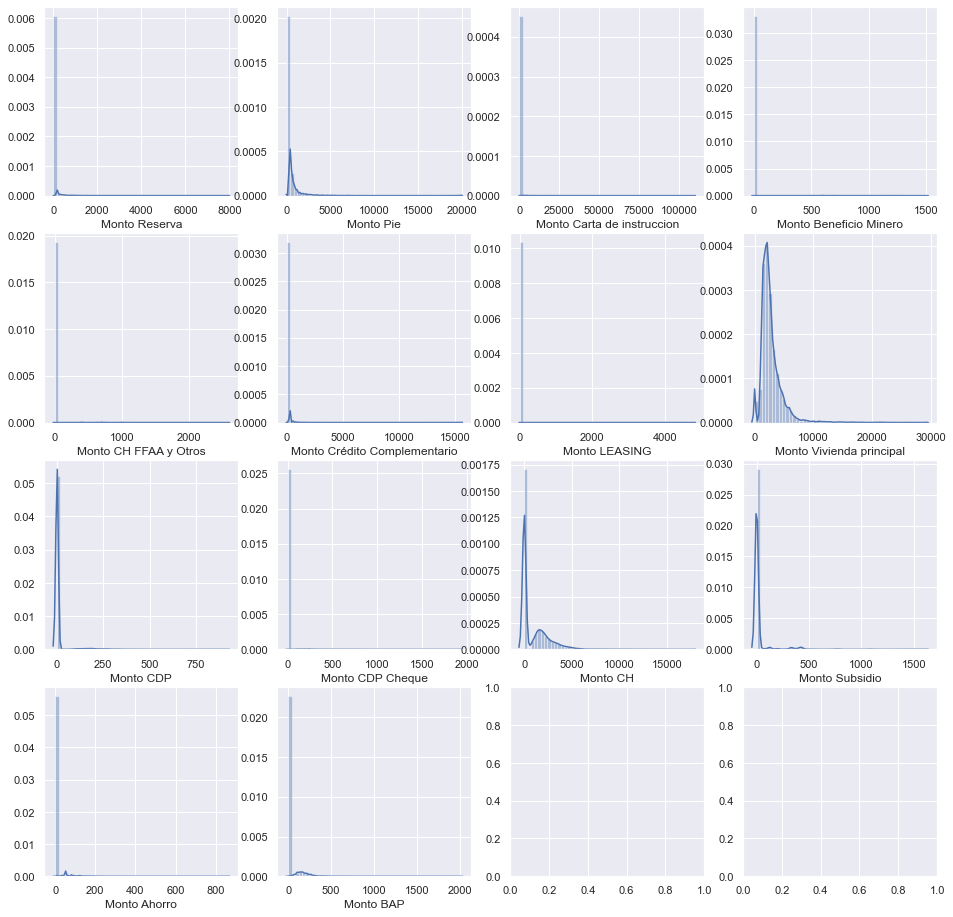

In [97]:
n_show = min(len(numeric_features),16)

fig, axes = plt.subplots(figsize=(16,4*int(np.ceil(n_show/4))), nrows=int(np.ceil(n_show/4)), ncols=4)
for i,  column in enumerate(numeric_features[:n_show]):
    sns.distplot(df_prepro[column], hist=True, rug=False, kde=True, ax=axes[i//4,i%4],label=column)
  #sns.kdeplot(x=data[column], y=data['Age'],ax=axes[i//4,i%4])
  #sns.scatterplot(data=data,x=column, y='SalePrice',ax=axes[i//4,i%4])
    i = i+1
plt.show()

## Scaler

In [98]:
scaler = StandardScaler()

scaler.fit(X_train[get_columns(0, 'Monto')])

X_train_1[get_columns(0, 'Monto')] = scaler.transform(X_train_1[get_columns(0, 'Monto')])
X_test_1[get_columns(0, 'Monto')] = scaler.transform(X_test_1[get_columns(0, 'Monto')])

X_train[get_columns(0, 'Monto')] = scaler.transform(X_train[get_columns(0, 'Monto')])
X_test[get_columns(0, 'Monto')] = scaler.transform(X_test[get_columns(0, 'Monto')])


# Modelos

## Regresión Logística

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [197]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_test, y_pred, digits=5))


Matriz de confusion:
 
[[   0  483]
 [   4 4436]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.00000   0.00000   0.00000       483
   Escritura    0.90181   0.99910   0.94796      4440

    accuracy                        0.90108      4923
   macro avg    0.45090   0.49955   0.47398      4923
weighted avg    0.81333   0.90108   0.85496      4923



C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [194]:
clf = LogisticRegression(penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced").fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_test, y_pred, digits=5))


Matriz de confusion:
 
[[ 343  140]
 [1652 2788]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.17193   0.71014   0.27684       483
   Escritura    0.95219   0.62793   0.75679      4440

    accuracy                        0.63599      4923
   macro avg    0.56206   0.66904   0.51681      4923
weighted avg    0.87563   0.63599   0.70970      4923



In [104]:
print('Real', 'Predicho', 'Probabilidad')
prob = clf.predict_proba(X_test)
for i in range(len(y_test)):
    print(y_test.tolist()[i], y_pred[i], prob[i])

Real Predicho Probabilidad
Escritura Escritura [0.30893327 0.69106673]
Escritura Desiste [0.69702287 0.30297713]
Escritura Escritura [0.36746659 0.63253341]
Escritura Escritura [0.2301537 0.7698463]
Escritura Escritura [0.11410932 0.88589068]
Escritura Desiste [0.62789116 0.37210884]
Escritura Escritura [0.3235042 0.6764958]
Escritura Desiste [0.72514232 0.27485768]
Escritura Escritura [0.41722941 0.58277059]
Escritura Desiste [0.56414692 0.43585308]
Escritura Escritura [0.35786977 0.64213023]
Escritura Desiste [0.56478022 0.43521978]
Escritura Escritura [0.40004606 0.59995394]
Escritura Escritura [0.41841624 0.58158376]
Escritura Escritura [0.30235729 0.69764271]
Escritura Escritura [0.4551372 0.5448628]
Escritura Desiste [0.71952534 0.28047466]
Escritura Desiste [0.53900126 0.46099874]
Escritura Escritura [0.11005515 0.88994485]
Escritura Escritura [0.28682183 0.71317817]
Escritura Escritura [0.25213293 0.74786707]
Escritura Desiste [0.6224088 0.3775912]
Escritura Escritura [0.316265

Escritura Desiste [0.67608726 0.32391274]
Escritura Escritura [0.30428075 0.69571925]
Escritura Escritura [0.37542883 0.62457117]
Escritura Escritura [0.33088718 0.66911282]
Escritura Escritura [0.36170974 0.63829026]
Escritura Escritura [0.25862144 0.74137856]
Escritura Desiste [0.68877691 0.31122309]
Escritura Escritura [0.25066423 0.74933577]
Escritura Escritura [0.23962757 0.76037243]
Escritura Escritura [0.3371546 0.6628454]
Escritura Escritura [0.48660242 0.51339758]
Escritura Escritura [0.21864797 0.78135203]
Escritura Escritura [0.32730266 0.67269734]
Escritura Escritura [0.34588136 0.65411864]
Escritura Desiste [0.75787723 0.24212277]
Escritura Desiste [0.60263529 0.39736471]
Escritura Desiste [0.70809625 0.29190375]
Escritura Escritura [0.25752452 0.74247548]
Escritura Desiste [0.60535771 0.39464229]
Escritura Escritura [0.24509901 0.75490099]
Escritura Escritura [0.22212551 0.77787449]
Escritura Desiste [0.74922473 0.25077527]
Escritura Desiste [0.52955045 0.47044955]
Escrit

Escritura Desiste [0.62991961 0.37008039]
Escritura Desiste [0.76368624 0.23631376]
Escritura Desiste [0.55747976 0.44252024]
Escritura Escritura [0.25423813 0.74576187]
Escritura Escritura [0.28352868 0.71647132]
Escritura Desiste [0.76121593 0.23878407]
Escritura Escritura [0.18524425 0.81475575]
Escritura Escritura [0.22734267 0.77265733]
Escritura Desiste [0.66784098 0.33215902]
Escritura Desiste [0.58899875 0.41100125]
Escritura Escritura [0.38843432 0.61156568]
Escritura Escritura [0.28352675 0.71647325]
Escritura Desiste [0.68124598 0.31875402]
Escritura Escritura [0.36626315 0.63373685]
Escritura Escritura [0.3785375 0.6214625]
Escritura Escritura [0.22577346 0.77422654]
Escritura Escritura [0.27515095 0.72484905]
Escritura Escritura [0.2094071 0.7905929]
Escritura Desiste [0.6365583 0.3634417]
Escritura Desiste [0.69942544 0.30057456]
Escritura Desiste [0.6977285 0.3022715]
Escritura Desiste [0.70555071 0.29444929]
Escritura Escritura [0.31967587 0.68032413]
Escritura Escritur

Escritura Escritura [0.33239548 0.66760452]
Escritura Escritura [0.21285601 0.78714399]
Escritura Desiste [0.80396998 0.19603002]
Escritura Desiste [0.51055439 0.48944561]
Escritura Escritura [0.46908065 0.53091935]
Escritura Desiste [0.60240789 0.39759211]
Escritura Escritura [0.28250002 0.71749998]
Escritura Desiste [0.5983773 0.4016227]
Escritura Escritura [0.20165255 0.79834745]
Escritura Escritura [0.12599571 0.87400429]
Escritura Escritura [0.39722499 0.60277501]
Escritura Escritura [0.32548362 0.67451638]
Escritura Escritura [0.27912928 0.72087072]
Escritura Desiste [0.5845504 0.4154496]
Escritura Escritura [0.29746538 0.70253462]
Escritura Escritura [0.26644673 0.73355327]
Escritura Escritura [0.25886852 0.74113148]
Escritura Escritura [0.27311133 0.72688867]
Escritura Escritura [0.19659261 0.80340739]
Escritura Desiste [0.69273785 0.30726215]
Escritura Escritura [0.20406471 0.79593529]
Escritura Escritura [0.29956103 0.70043897]
Escritura Escritura [0.17668468 0.82331532]
Escr

Escritura Desiste [0.65257813 0.34742187]
Escritura Escritura [0.30319397 0.69680603]
Escritura Escritura [0.27830731 0.72169269]
Escritura Escritura [0.44691715 0.55308285]
Escritura Desiste [0.65372335 0.34627665]
Escritura Desiste [0.56888057 0.43111943]
Escritura Desiste [0.55428161 0.44571839]
Escritura Escritura [0.2708928 0.7291072]
Escritura Desiste [0.64845509 0.35154491]
Escritura Desiste [0.6315902 0.3684098]
Escritura Desiste [0.63233142 0.36766858]
Escritura Escritura [0.18193619 0.81806381]
Escritura Desiste [0.67462499 0.32537501]
Escritura Escritura [0.2645698 0.7354302]
Escritura Escritura [0.11178553 0.88821447]
Escritura Desiste [0.63718448 0.36281552]
Escritura Escritura [0.32999806 0.67000194]
Escritura Escritura [0.1882755 0.8117245]
Escritura Desiste [0.62297106 0.37702894]
Escritura Escritura [0.41240627 0.58759373]
Escritura Desiste [0.68576658 0.31423342]
Escritura Desiste [0.63633688 0.36366312]
Escritura Escritura [0.43045481 0.56954519]
Escritura Desiste [0

Escritura Escritura [0.3376971 0.6623029]
Escritura Desiste [0.65016336 0.34983664]
Escritura Escritura [0.23470492 0.76529508]
Escritura Escritura [0.23115655 0.76884345]
Escritura Escritura [0.31150358 0.68849642]
Escritura Desiste [0.62435458 0.37564542]
Escritura Escritura [0.33503537 0.66496463]
Escritura Escritura [0.20465327 0.79534673]
Escritura Escritura [0.32678895 0.67321105]
Escritura Escritura [0.47211928 0.52788072]
Escritura Desiste [0.63671805 0.36328195]
Escritura Desiste [0.57428612 0.42571388]
Escritura Escritura [0.26884494 0.73115506]
Escritura Escritura [0.45532205 0.54467795]
Escritura Desiste [0.65480652 0.34519348]
Escritura Escritura [0.29300843 0.70699157]
Escritura Escritura [0.29075318 0.70924682]
Escritura Escritura [0.40671881 0.59328119]
Escritura Escritura [0.36516666 0.63483334]
Escritura Desiste [0.80495835 0.19504165]
Escritura Desiste [0.67840791 0.32159209]
Escritura Desiste [0.62401802 0.37598198]
Escritura Escritura [0.3294183 0.6705817]
Escritur

Escritura Escritura [0.2621887 0.7378113]
Escritura Escritura [0.20019951 0.79980049]
Escritura Escritura [0.42059059 0.57940941]
Escritura Desiste [0.63042371 0.36957629]
Escritura Escritura [0.24322739 0.75677261]
Escritura Desiste [0.70982052 0.29017948]
Escritura Escritura [0.22214709 0.77785291]
Escritura Escritura [0.2428466 0.7571534]
Escritura Escritura [0.21308146 0.78691854]
Escritura Escritura [0.18008883 0.81991117]
Escritura Desiste [0.61164829 0.38835171]
Escritura Escritura [0.1486178 0.8513822]
Escritura Escritura [0.3550484 0.6449516]
Escritura Escritura [0.25357336 0.74642664]
Escritura Escritura [0.3064929 0.6935071]
Escritura Escritura [0.24170613 0.75829387]
Escritura Escritura [0.27436887 0.72563113]
Escritura Escritura [0.33689786 0.66310214]
Escritura Desiste [0.58885357 0.41114643]
Escritura Escritura [0.17457431 0.82542569]
Escritura Desiste [0.57373656 0.42626344]
Escritura Desiste [0.56289508 0.43710492]
Escritura Escritura [0.23275438 0.76724562]
Escritura 

Escritura Desiste [0.67496126 0.32503874]
Escritura Escritura [0.35407474 0.64592526]
Escritura Escritura [0.30417106 0.69582894]
Escritura Escritura [0.1430113 0.8569887]
Escritura Escritura [0.36738138 0.63261862]
Escritura Escritura [0.34465239 0.65534761]
Escritura Escritura [0.35770644 0.64229356]
Escritura Desiste [0.60491157 0.39508843]
Escritura Escritura [0.3054137 0.6945863]
Escritura Escritura [0.22905898 0.77094102]
Escritura Escritura [0.40436251 0.59563749]
Escritura Escritura [0.49843579 0.50156421]
Escritura Escritura [0.30339877 0.69660123]
Escritura Escritura [0.07796226 0.92203774]
Escritura Desiste [0.51044605 0.48955395]
Escritura Escritura [0.46924108 0.53075892]
Escritura Escritura [0.02060389 0.97939611]
Escritura Escritura [0.2274016 0.7725984]
Escritura Escritura [0.15839382 0.84160618]
Escritura Escritura [0.34750727 0.65249273]
Escritura Escritura [0.25544424 0.74455576]
Escritura Desiste [0.8729885 0.1270115]
Escritura Escritura [0.24774396 0.75225604]
Escr

Escritura Escritura [0.38655208 0.61344792]
Escritura Escritura [0.22484938 0.77515062]
Escritura Desiste [0.63536548 0.36463452]
Escritura Escritura [0.39371792 0.60628208]
Escritura Escritura [0.28815538 0.71184462]
Escritura Desiste [0.60531561 0.39468439]
Escritura Escritura [0.28993851 0.71006149]
Escritura Escritura [0.26562123 0.73437877]
Escritura Escritura [0.366404 0.633596]
Escritura Desiste [0.53654822 0.46345178]
Escritura Desiste [0.64057231 0.35942769]
Escritura Desiste [0.54654353 0.45345647]
Escritura Escritura [0.31143392 0.68856608]
Escritura Escritura [0.14660136 0.85339864]
Escritura Escritura [0.26090286 0.73909714]
Escritura Desiste [0.62072569 0.37927431]
Escritura Escritura [0.25151979 0.74848021]
Escritura Escritura [0.2721433 0.7278567]
Escritura Escritura [0.33314071 0.66685929]
Escritura Desiste [0.74250244 0.25749756]
Escritura Escritura [0.4826217 0.5173783]
Escritura Desiste [0.72540865 0.27459135]
Escritura Escritura [0.28254701 0.71745299]
Escritura Es

Escritura Escritura [0.29961121 0.70038879]
Escritura Desiste [0.69496956 0.30503044]
Escritura Escritura [0.39404473 0.60595527]
Escritura Desiste [0.59523632 0.40476368]
Escritura Desiste [0.58310413 0.41689587]
Escritura Escritura [0.412329 0.587671]
Escritura Escritura [0.48839093 0.51160907]
Escritura Escritura [0.24989444 0.75010556]
Escritura Desiste [0.556181 0.443819]
Escritura Desiste [0.53813359 0.46186641]
Escritura Desiste [0.74419705 0.25580295]
Escritura Desiste [0.55468979 0.44531021]
Escritura Escritura [0.29235441 0.70764559]
Desiste Desiste [0.64986692 0.35013308]
Desiste Desiste [0.60611895 0.39388105]
Desiste Escritura [0.4206619 0.5793381]
Desiste Desiste [0.65138198 0.34861802]
Desiste Desiste [0.58855226 0.41144774]
Desiste Desiste [0.77367852 0.22632148]
Desiste Escritura [0.31001462 0.68998538]
Desiste Desiste [0.63921622 0.36078378]
Desiste Desiste [0.61349913 0.38650087]
Desiste Desiste [0.65191948 0.34808052]
Desiste Desiste [0.60552615 0.39447385]
Desiste 

## Remuestreo Clase Minoritaria

In [106]:
X_train_1

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,...,Comuna Estandarizada_Vitacura,Comuna Estandarizada_X Región de Los Lagos,Comuna Estandarizada_XI Región Aysén del General Carlos Ibáñez del Campo,Comuna Estandarizada_XII Región de Magallanes y de la Antártica Chilena,Comuna Estandarizada_XIV Región de Los Ríos,Comuna Estandarizada_XV Región de Arica y Parinacota,Comuna Estandarizada_XVI Región de Ñuble,Comuna Estandarizada_Ñuñoa,cluster,Etiqueta
18965,-0.237820,-0.014490,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,-0.389774,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,3,Escritura
1262,0.112674,-0.377468,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,-0.316448,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,4,Escritura
16701,0.126693,0.126346,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,-0.474094,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,3,Escritura
19519,-0.167721,0.158317,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,1.035375,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,1,Escritura
8021,-0.097623,-0.377468,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,0.091561,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,4,Escritura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17497,0.112674,1.321269,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,5.936189,-0.201095,-0.082281,...,1,0,0,0,0,0,0,0,2,Desiste
15198,-0.237820,-0.261315,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,-0.299787,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,3,Desiste
15269,-0.213286,-0.261315,-0.022313,-0.046823,-0.068004,2.261301,-0.02385,-0.424761,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,3,Desiste
15678,-0.167721,-0.282324,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,-0.254120,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,3,Desiste


In [107]:
from sklearn.utils import resample

# concatenar el conjunto de entrenamiento
X = pd.concat([X_train_1.drop('Etiqueta', axis=1), y_train], axis=1)

# separar las clases
escritura = X[X['Etiqueta'] == 'Escritura']
desiste = X[X['Etiqueta'] == 'Desiste']

# remuestrear  clase minoritaria
desiste_upsampled = resample(desiste,
                          replace=True, # sample with replacement
                          n_samples=len(escritura), # match number in majority class
                          random_state=27) # reproducible results

# recombinar resultados
upsampled = pd.concat([escritura, desiste_upsampled])

# chequear el número de elementos por clases
upsampled['Etiqueta'].value_counts()

Desiste      17757
Escritura    17757
Name: Etiqueta, dtype: int64

In [108]:
# datos de entrenamiento sobre-balanceados
y_train_min = upsampled['Etiqueta']
X_train_min = upsampled.drop('Etiqueta', axis=1)

In [212]:
X_tr_min, X_te_min, y_tr_min, y_te_min = train_test_split(X_train_min, y_train_min, test_size=0.2, random_state=42)

In [109]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [213]:
upsampled = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg") # algoritmo de regresion logistica

upsampled.fit(X_tr_min, y_tr_min)

# metrics

y_true =  list(y_te_min)
y_pred = list(upsampled.predict(X_te_min))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_te_min, y_pred, digits=5))


Matriz de confusion:
 
[[2684  878]
 [1398 2143]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.65752   0.75351   0.70225      3562
   Escritura    0.70937   0.60520   0.65315      3541

    accuracy                        0.67957      7103
   macro avg    0.68344   0.67935   0.67770      7103
weighted avg    0.68337   0.67957   0.67777      7103



## Remuestreo Clase Mayoritaria

In [111]:
# remuestreo clase mayoritaria
escritura_downsampled = resample(escritura,
                                replace = False, # sample without replacement
                                n_samples = len(desiste), # match minority n
                                random_state = 27) # reproducible results

# recombinar resultados
downsampled = pd.concat([escritura_downsampled, desiste])

# chequear el número de elementos por clases
downsampled['Etiqueta'].value_counts()

Desiste      1931
Escritura    1931
Name: Etiqueta, dtype: int64

In [112]:
# datos de entrenamiento sub-balanceados

y_train_may = downsampled['Etiqueta']
X_train_may = downsampled.drop('Etiqueta', axis=1)

In [209]:
X_tr_may, X_te_may, y_tr_may, y_te_may = train_test_split(X_train_may, y_train_may, test_size=0.2, random_state=42)

In [211]:
undersampled = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg") # modelo de regresi+on logística

undersampled.fit(X_tr_may, y_tr_may)
# metrics

y_true =  list(y_te_may)
y_pred = list(undersampled.predict(X_te_may))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_te_may, y_pred, digits=5))


Matriz de confusion:
 
[[268 105]
 [152 248]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.63810   0.71850   0.67591       373
   Escritura    0.70255   0.62000   0.65870       400

    accuracy                        0.66753       773
   macro avg    0.67032   0.66925   0.66731       773
weighted avg    0.67145   0.66753   0.66701       773



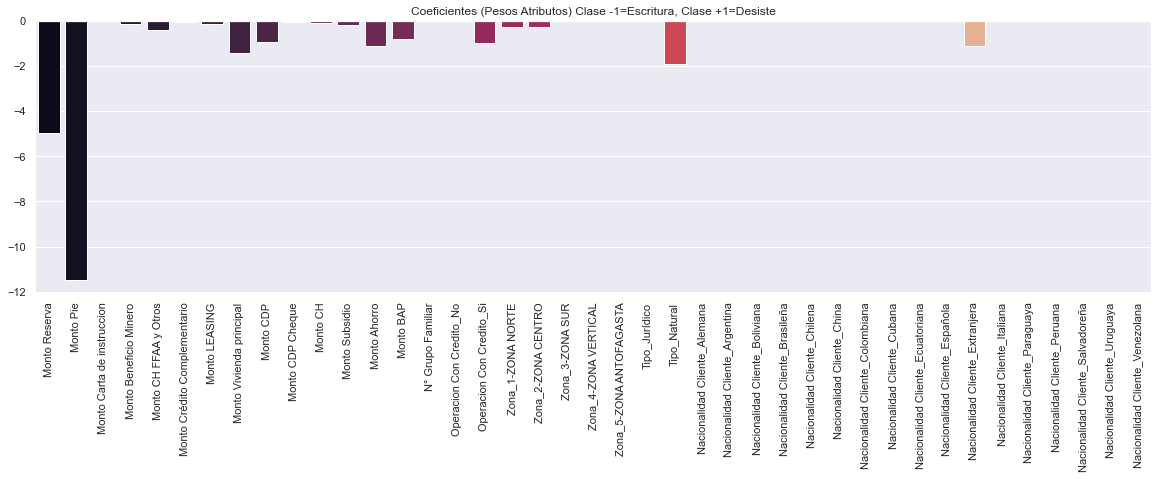

In [184]:
w = best.coef_
b = best.intercept_

class1 = 'Escritura' #-1
class2 = 'Desiste' #+1 -> linea 579 sklearn/linear_model/_stochastic_gradient.py fit_binary(self, 1, X, y, alpha, C,

max_feat = min(len(w[0,:]),41)

fig, ax = plt.subplots(figsize=(20,5),nrows=1)
p = sns.barplot(data= df_prepro, x=np.arange(max_feat), y=w[0,:max_feat], palette="rocket",ax=ax)
ax.set_xticklabels(X.columns[:max_feat])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos) Clase -1=%s, Clase +1=%s'%(class1,class2))
plt.show()

print("")

In [116]:
X_train

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,...,Comuna Estandarizada_VIII Región del Biobío,Comuna Estandarizada_Vitacura,Comuna Estandarizada_X Región de Los Lagos,Comuna Estandarizada_XI Región Aysén del General Carlos Ibáñez del Campo,Comuna Estandarizada_XII Región de Magallanes y de la Antártica Chilena,Comuna Estandarizada_XIV Región de Los Ríos,Comuna Estandarizada_XV Región de Arica y Parinacota,Comuna Estandarizada_XVI Región de Ñuble,Comuna Estandarizada_Ñuñoa,cluster
18965,-0.237820,-0.014490,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,-0.389774,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,0,3
1262,0.112674,-0.377468,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,-0.316448,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,0,4
16701,0.126693,0.126346,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,-0.474094,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,0,3
19519,-0.167721,0.158317,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,1.035375,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,0,1
8021,-0.097623,-0.377468,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,0.091561,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17497,0.112674,1.321269,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,5.936189,-0.201095,-0.082281,...,0,1,0,0,0,0,0,0,0,2
15198,-0.237820,-0.261315,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,-0.299787,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,0,3
15269,-0.213286,-0.261315,-0.022313,-0.046823,-0.068004,2.261301,-0.02385,-0.424761,-0.201095,-0.082281,...,1,0,0,0,0,0,0,0,0,3
15678,-0.167721,-0.282324,-0.022313,-0.046823,-0.068004,-0.091839,-0.02385,-0.254120,-0.201095,-0.082281,...,0,0,0,0,0,0,0,0,0,3


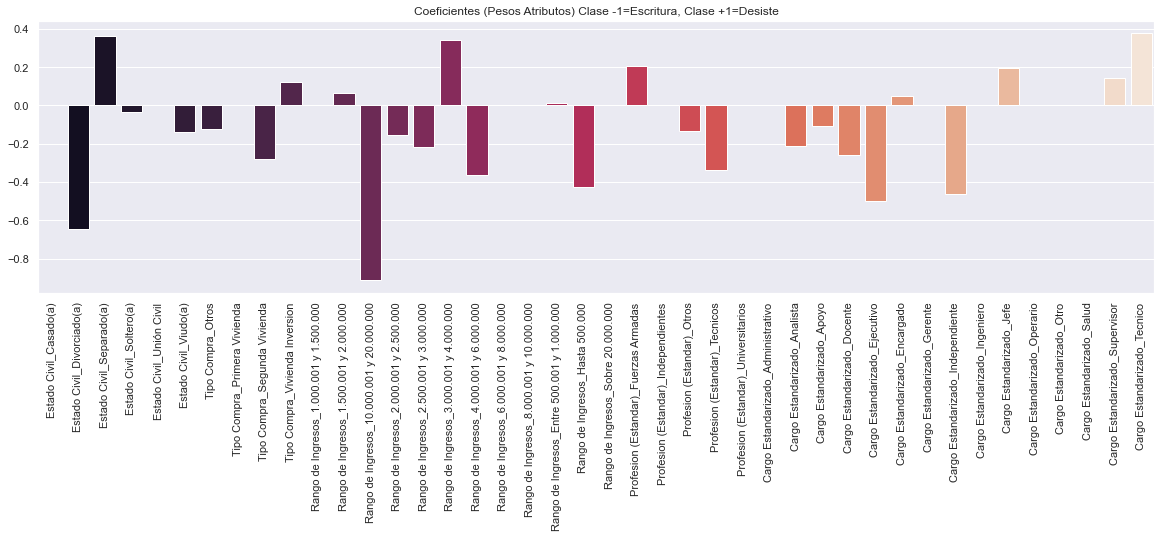

In [185]:
w = best.coef_
b = best.intercept_

class1 = 'Escritura' #-1
class2 = 'Desiste' #+1 -> linea 579 sklearn/linear_model/_stochastic_gradient.py fit_binary(self, 1, X, y, alpha, C,

max_feat = 83

fig, ax = plt.subplots(figsize=(20,5),nrows=1)
p = sns.barplot(data= X_train, x=np.arange(max_feat-41), y=w[0,41:max_feat], palette="rocket",ax=ax)
ax.set_xticklabels(X.columns[41:max_feat])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos) Clase -1=%s, Clase +1=%s'%(class1,class2))
plt.show()

print("")

In [118]:
df_prepro[(df_prepro['Comuna Estandarizada_Las Condes'] == 1)& (df_prepro['Etiqueta']=='Desiste')]

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,...,Comuna Estandarizada_Vitacura,Comuna Estandarizada_X Región de Los Lagos,Comuna Estandarizada_XI Región Aysén del General Carlos Ibáñez del Campo,Comuna Estandarizada_XII Región de Magallanes y de la Antártica Chilena,Comuna Estandarizada_XIV Región de Los Ríos,Comuna Estandarizada_XV Región de Arica y Parinacota,Comuna Estandarizada_XVI Región de Ñuble,Comuna Estandarizada_Ñuñoa,cluster,Etiqueta
261,10.00,399.09,0.00,0.0,0.0,0.0,0.0,4544.01,0.0,408.91,...,0,0,0,0,0,0,0,0,1,Desiste
299,30.01,0.00,0.00,0.0,0.0,0.0,0.0,2547.00,0.0,0.00,...,0,0,0,0,0,0,0,0,4,Desiste
424,10.00,0.00,0.00,0.0,0.0,0.0,0.0,4732.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0,Desiste
522,50.00,0.00,0.00,0.0,0.0,0.0,0.0,9890.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0,Desiste
534,5.00,0.00,0.00,0.0,0.0,0.0,0.0,1594.00,0.0,0.00,...,0,0,0,0,0,0,0,0,4,Desiste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,50.00,982.00,0.00,0.0,0.0,0.0,0.0,10317.00,0.0,0.00,...,0,0,0,0,0,0,0,0,2,Desiste
23251,10.00,1327.93,3096.98,0.0,0.0,0.0,0.0,3114.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0,Desiste
23472,50.00,764.00,0.00,0.0,0.0,0.0,0.0,3618.00,0.0,0.00,...,0,0,0,0,0,0,0,0,3,Desiste
23710,50.00,4650.00,0.00,0.0,0.0,0.0,0.0,12950.00,0.0,0.00,...,0,0,0,0,0,0,0,0,2,Desiste


In [119]:
df_prepro[(df_prepro['Comuna Estandarizada_La Granja'] == 1)& (df_prepro['Etiqueta']=='Escritura')]

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,...,Comuna Estandarizada_Vitacura,Comuna Estandarizada_X Región de Los Lagos,Comuna Estandarizada_XI Región Aysén del General Carlos Ibáñez del Campo,Comuna Estandarizada_XII Región de Magallanes y de la Antártica Chilena,Comuna Estandarizada_XIV Región de Los Ríos,Comuna Estandarizada_XV Región de Arica y Parinacota,Comuna Estandarizada_XVI Región de Ñuble,Comuna Estandarizada_Ñuñoa,cluster,Etiqueta
701,10.0,0.00,0.0,0.0,0.0,0.0,0.0,4464.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Escritura
855,5.0,0.00,0.0,0.0,0.0,0.0,0.0,2302.0,131.0,0.0,...,0,0,0,0,0,0,0,0,4,Escritura
885,5.0,0.00,0.0,0.0,0.0,0.0,0.0,1892.0,0.0,0.0,...,0,0,0,0,0,0,0,0,4,Escritura
1668,5.0,0.00,0.0,0.0,0.0,0.0,0.0,2587.0,226.0,0.0,...,0,0,0,0,0,0,0,0,4,Escritura
1749,14.0,0.00,0.0,0.0,0.0,0.0,0.0,4452.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Escritura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20655,14.0,498.00,0.0,0.0,0.0,0.0,0.0,3578.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,Escritura
21646,5.0,189.84,0.0,0.0,0.0,0.0,0.0,1905.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,Escritura
21696,20.0,437.00,0.0,0.0,0.0,0.0,0.0,4759.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,Escritura
22188,5.0,0.00,0.0,0.0,0.0,0.0,0.0,1427.0,0.0,0.0,...,0,0,0,0,0,0,0,0,4,Escritura


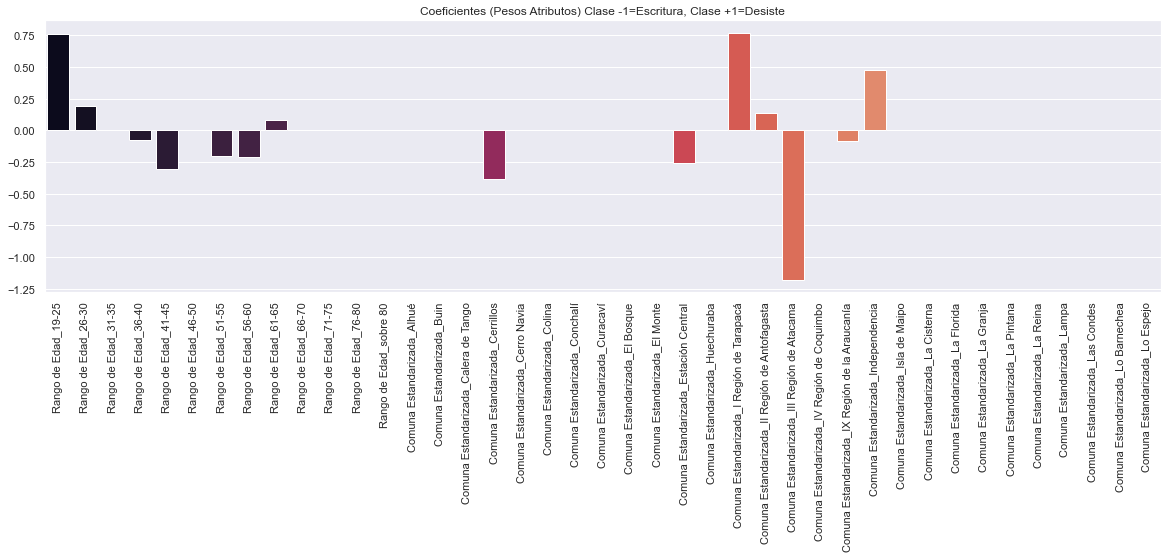

In [186]:
w = best.coef_
b = best.intercept_

class1 = 'Escritura' #-1
class2 = 'Desiste' #+1 -> linea 579 sklearn/linear_model/_stochastic_gradient.py fit_binary(self, 1, X, y, alpha, C,

max_feat = 124

fig, ax = plt.subplots(figsize=(20,5),nrows=1)
p = sns.barplot(data= df_prepro, x=np.arange(max_feat-83), y=w[0,83:max_feat], palette="rocket",ax=ax)
ax.set_xticklabels(X.columns[83:max_feat])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos) Clase -1=%s, Clase +1=%s'%(class1,class2))
plt.show()

print("")

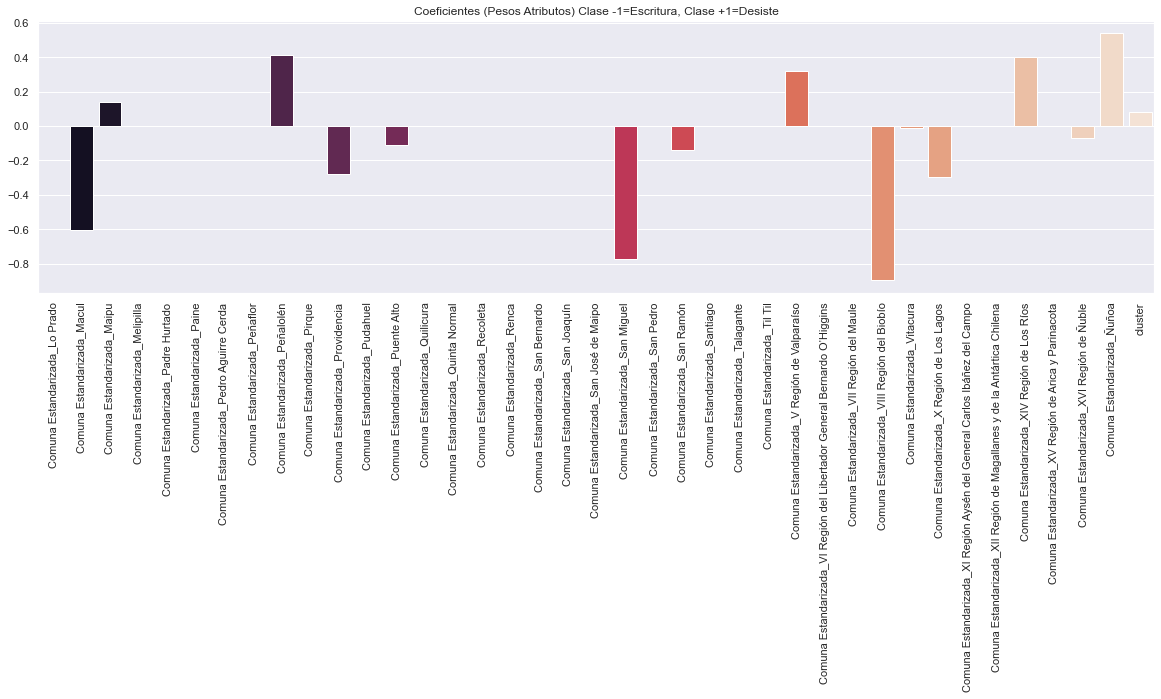

In [187]:
w = best.coef_
b = best.intercept_

class1 = 'Escritura' #-1
class2 = 'Desiste' #+1 -> linea 579 sklearn/linear_model/_stochastic_gradient.py fit_binary(self, 1, X, y, alpha, C,

max_feat = 163

fig, ax = plt.subplots(figsize=(20,5),nrows=1)
p = sns.barplot(data= df_prepro, x=np.arange(max_feat-124), y=w[0,124:max_feat], palette="rocket",ax=ax)
ax.set_xticklabels(X.columns[124:max_feat])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos) Clase -1=%s, Clase +1=%s'%(class1,class2))
plt.show()

print("")

In [190]:
df_prepro[(df_prepro['Comuna Estandarizada_V Región de Valparaíso']==1)&(df_prepro['Etiqueta']=='Escritura')]

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,...,Comuna Estandarizada_Vitacura,Comuna Estandarizada_X Región de Los Lagos,Comuna Estandarizada_XI Región Aysén del General Carlos Ibáñez del Campo,Comuna Estandarizada_XII Región de Magallanes y de la Antártica Chilena,Comuna Estandarizada_XIV Región de Los Ríos,Comuna Estandarizada_XV Región de Arica y Parinacota,Comuna Estandarizada_XVI Región de Ñuble,Comuna Estandarizada_Ñuñoa,cluster,Etiqueta
4,3.50,76.50,0.0,0.0,0.0,0.0,0.0,2065.91,0.0,0.0,...,0,0,0,0,0,0,0,0,3,Escritura
5,0.00,80.00,0.0,0.0,0.0,0.0,0.0,2092.17,0.0,0.0,...,0,0,0,0,0,0,0,0,3,Escritura
6,0.00,80.00,0.0,0.0,0.0,0.0,0.0,2245.69,0.0,0.0,...,0,0,0,0,0,0,0,0,3,Escritura
15,55.78,45.37,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,4,Escritura
23,109.00,1332.80,0.0,0.0,0.0,0.0,0.0,7589.00,0.0,0.0,...,0,0,0,0,0,0,0,0,1,Escritura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23704,10.00,350.85,0.0,0.0,0.0,0.0,0.0,2210.00,0.0,0.0,...,0,0,0,0,0,0,0,0,3,Escritura
23724,15.00,0.00,0.0,0.0,0.0,0.0,0.0,2583.00,243.0,0.0,...,0,0,0,0,0,0,0,0,3,Escritura
23730,15.00,0.00,0.0,0.0,0.0,0.0,0.0,2583.00,243.0,0.0,...,0,0,0,0,0,0,0,0,3,Escritura
24359,7.00,235.40,0.0,0.0,0.0,0.0,0.0,2499.00,0.0,0.0,...,0,0,0,0,0,0,0,0,3,Escritura


In [191]:
df_prepro[(df_prepro['Comuna Estandarizada_V Región de Valparaíso']==1)&(df_prepro['Etiqueta']=='Desiste')]

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,...,Comuna Estandarizada_Vitacura,Comuna Estandarizada_X Región de Los Lagos,Comuna Estandarizada_XI Región Aysén del General Carlos Ibáñez del Campo,Comuna Estandarizada_XII Región de Magallanes y de la Antártica Chilena,Comuna Estandarizada_XIV Región de Los Ríos,Comuna Estandarizada_XV Región de Arica y Parinacota,Comuna Estandarizada_XVI Región de Ñuble,Comuna Estandarizada_Ñuñoa,cluster,Etiqueta
99,3.49,78.31,0.0,0.0,0.00,300.0,0.0,2015.26,0.0,0.0,...,0,0,0,0,0,0,0,0,3,Desiste
115,0.00,2177.01,0.0,0.0,0.00,0.0,0.0,2075.20,0.0,0.0,...,0,0,0,0,0,0,0,0,4,Desiste
208,3.49,246.99,0.0,0.0,0.00,0.0,0.0,2272.05,0.0,0.0,...,0,0,0,0,0,0,0,0,3,Desiste
245,3.47,120.64,0.0,0.0,0.00,0.0,0.0,2030.26,0.0,0.0,...,0,0,0,0,0,0,0,0,3,Desiste
246,3.50,80.00,0.0,0.0,0.00,0.0,0.0,2284.33,0.0,0.0,...,0,0,0,0,0,0,0,0,3,Desiste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23231,25.00,1171.95,0.0,0.0,1226.05,0.0,0.0,2578.00,0.0,0.0,...,0,0,0,0,0,0,0,0,4,Desiste
23336,25.00,430.00,0.0,0.0,0.00,0.0,0.0,2114.00,0.0,0.0,...,0,0,0,0,0,0,0,0,3,Desiste
23352,14.00,348.00,0.0,0.0,0.00,0.0,0.0,3810.00,0.0,0.0,...,0,0,0,0,0,0,0,0,1,Desiste
23383,40.00,91.00,0.0,0.0,0.00,0.0,0.0,1190.00,0.0,0.0,...,0,0,0,0,0,0,0,0,4,Desiste


# SVM

In [122]:
from sklearn.svm import SVC

In [214]:
clf = SVC()
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_test, y_pred, digits=5))


Matriz de confusion:
 
[[   0  483]
 [   0 4440]]

Métricas:
 
              precision    recall  f1-score   support

          -1    0.00000   0.00000   0.00000       483
           1    0.90189   1.00000   0.94841      4440

    accuracy                        0.90189      4923
   macro avg    0.45094   0.50000   0.47421      4923
weighted avg    0.81340   0.90189   0.85536      4923



C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
clf = SVC(kernel = 'rbf', C= 10000)
clf.fit(X_train, y_train_svm) 

y_pred = clf.predict(X_test)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test_svm,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_test_svm, y_pred, digits=5))


Matriz de confusion:
 
[[  83  400]
 [ 423 4017]]

Métricas:
 
              precision    recall  f1-score   support

          -1    0.16403   0.17184   0.16785       483
           1    0.90944   0.90473   0.90708      4440

    accuracy                        0.83283      4923
   macro avg    0.53674   0.53829   0.53746      4923
weighted avg    0.83631   0.83283   0.83455      4923



## Con Balanceo Clase Minoritaria

In [216]:
clf = SVC(C=10)
clf.fit(X_tr_min, y_tr_min) 

y_pred = clf.predict(X_te_min)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_te_min,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_te_min, y_pred, digits=5))


Matriz de confusion:
 
[[3066  496]
 [ 936 2605]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.76612   0.86075   0.81068      3562
   Escritura    0.84005   0.73567   0.78440      3541

    accuracy                        0.79840      7103
   macro avg    0.80308   0.79821   0.79754      7103
weighted avg    0.80297   0.79840   0.79758      7103



## Con Balanceo Clase Mayoritaria

In [217]:
clf = SVC(kernel = 'rbf')
clf.fit(X_tr_may, y_tr_may) 

y_pred = clf.predict(X_te_may)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_te_may,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_te_may, y_pred, digits=5))


Matriz de confusion:
 
[[283  90]
 [151 249]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.65207   0.75871   0.70136       373
   Escritura    0.73451   0.62250   0.67388       400

    accuracy                        0.68823       773
   macro avg    0.69329   0.69061   0.68762       773
weighted avg    0.69473   0.68823   0.68714       773



# Decision Tree

In [128]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [222]:
regr_2=tree.DecisionTreeClassifier()
regr_2.fit(X_train,y_train)

y_pred = regr_2.predict(X_test)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_test, y_pred, digits=5))


Matriz de confusion:
 
[[ 103  380]
 [ 441 3999]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.18934   0.21325   0.20058       483
   Escritura    0.91322   0.90068   0.90691      4440

    accuracy                        0.83323      4923
   macro avg    0.55128   0.55696   0.55374      4923
weighted avg    0.84220   0.83323   0.83761      4923



In [227]:
regr_2=tree.DecisionTreeClassifier(max_depth = 24)
regr_2.fit(X_train,y_train)

y_pred = regr_2.predict(X_test)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_test, y_pred, digits=5))


Matriz de confusion:
 
[[  71  412]
 [ 311 4129]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.18586   0.14700   0.16416       483
   Escritura    0.90927   0.92995   0.91950      4440

    accuracy                        0.85314      4923
   macro avg    0.54757   0.53848   0.54183      4923
weighted avg    0.83830   0.85314   0.84539      4923



## Balanceo con Clase Minoritaria

In [228]:
regr_2=tree.DecisionTreeClassifier(max_depth=5)
regr_2.fit(X_tr_min,y_tr_min)

y_pred = regr_2.predict(X_te_min)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_te_min,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_te_min, y_pred, digits=5))


Matriz de confusion:
 
[[2661  901]
 [1278 2263]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.67555   0.74705   0.70951      3562
   Escritura    0.71523   0.63909   0.67502      3541

    accuracy                        0.69323      7103
   macro avg    0.69539   0.69307   0.69226      7103
weighted avg    0.69533   0.69323   0.69231      7103



## Balanceo con Clase Mayoritaria

In [229]:
regr_2=tree.DecisionTreeClassifier()
regr_2.fit(X_tr_may,y_tr_may)

y_pred = regr_2.predict(X_te_may)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_te_may,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_te_may, y_pred, digits=5))


Matriz de confusion:
 
[[222 151]
 [174 226]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.56061   0.59517   0.57737       373
   Escritura    0.59947   0.56500   0.58172       400

    accuracy                        0.57956       773
   macro avg    0.58004   0.58009   0.57955       773
weighted avg    0.58072   0.57956   0.57962       773



## Naive Bayes

In [132]:
from sklearn.naive_bayes import GaussianNB

In [133]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_test, y_pred, digits=5))


Matriz de confusion:
 
[[ 463   20]
 [4181  259]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.09970   0.95859   0.18061       483
   Escritura    0.92832   0.05833   0.10977      4440

    accuracy                        0.14666      4923
   macro avg    0.51401   0.50846   0.14519      4923
weighted avg    0.84702   0.14666   0.11672      4923



## Remuestreo Clase minoritaria

In [134]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train_min, y_train_min).predict(X_test)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_test, y_pred, digits=5))


Matriz de confusion:
 
[[ 461   22]
 [4126  314]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.10050   0.95445   0.18185       483
   Escritura    0.93452   0.07072   0.13149      4440

    accuracy                        0.15742      4923
   macro avg    0.51751   0.51259   0.15667      4923
weighted avg    0.85270   0.15742   0.13643      4923



## Remuestreo Clase Mayoritaria

In [135]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train_may, y_train_may).predict(X_test)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_test, y_pred, digits=5))


Matriz de confusion:
 
[[  47  436]
 [ 338 4102]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.12208   0.09731   0.10829       483
   Escritura    0.90392   0.92387   0.91379      4440

    accuracy                        0.84278      4923
   macro avg    0.51300   0.51059   0.51104      4923
weighted avg    0.82721   0.84278   0.83476      4923



# Estrategia: Ensamble de Modelos con Balanceo

In [136]:
from imblearn.ensemble import BalancedBaggingClassifier

In [137]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

#Train the classifier.
bbc.fit(X_train, y_train)
pred_y = bbc.predict(X_test)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_test, y_pred, digits=5))


Matriz de confusion:
 
[[  47  436]
 [ 338 4102]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.12208   0.09731   0.10829       483
   Escritura    0.90392   0.92387   0.91379      4440

    accuracy                        0.84278      4923
   macro avg    0.51300   0.51059   0.51104      4923
weighted avg    0.82721   0.84278   0.83476      4923



# NearMiss

In [138]:
from imblearn.under_sampling import NearMiss

In [139]:
nr = NearMiss()

In [140]:
X = df_prepro.drop(['Etiqueta'], axis=1)
y = df_prepro['Etiqueta']

In [141]:
X, y = nr.fit_sample(X,y)

In [142]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=43)

In [143]:
clf = LogisticRegression(C=0.5,penalty='l2',random_state=1,solver="newton-cg").fit(X_tr, y_tr)

y_pred = clf.predict(X_te)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_te,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_te, y_pred, digits=5))


Matriz de confusion:
 
[[416  70]
 [ 23 457]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.94761   0.85597   0.89946       486
   Escritura    0.86717   0.95208   0.90765       480

    accuracy                        0.90373       966
   macro avg    0.90739   0.90403   0.90355       966
weighted avg    0.90764   0.90373   0.90353       966



## SMOTE

In [144]:
from imblearn.over_sampling import SMOTE

In [145]:
X = df_prepro.drop(['Etiqueta'], axis=1)
y = df_prepro['Etiqueta']

In [146]:
smt = SMOTE()

In [147]:
X, y = smt.fit_sample(X,y)

In [148]:
X['Etiqueta'] = y

In [149]:
X = X.dropna().reset_index(drop=True)

In [150]:
y = X['Etiqueta']
X = X.drop(['Etiqueta'], axis=1)

In [151]:
X_tr_2, X_te_2, y_tr_2, y_te_2 = train_test_split(X, y, test_size=0.2, random_state=43)

In [152]:
clf_2 = LogisticRegression().fit(X_tr_2, y_tr_2)

y_pred = clf.predict(X_te_2)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_te_2,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_te_2, y_pred, digits=5))

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Matriz de confusion:
 
[[3720  679]
 [2927 1480]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.55965   0.84565   0.67355      4399
   Escritura    0.68550   0.33583   0.45081      4407

    accuracy                        0.59051      8806
   macro avg    0.62258   0.59074   0.56218      8806
weighted avg    0.62263   0.59051   0.56208      8806



## Finalmente nos quedamos con la estrategia NearMiss y encontramos los mejores parámetros

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
scaler = StandardScaler()

scaler.fit(X_tr[get_columns(0, 'Monto')])

X_tr[get_columns(0, 'Monto')] = scaler.transform(X_tr[get_columns(0, 'Monto')])
X_te[get_columns(0, 'Monto')] = scaler.transform(X_te[get_columns(0, 'Monto')])

In [155]:
parameters = {'penalty': ('l1', 'l2', 'elasticnet', 'none'), 'dual': (True, False),
              'C': np.linspace(0,10,21), 'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters)
grid_result = clf.fit(X_tr, y_tr)
print("Best: %f con %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1360, in fit
    sample_weight=sample_weight)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py", line 969, in _fit_liblinear
    epsilon, sample_weight)
  File "sklearn\svm\_liblinear.pyx", line 52, in sklearn.svm._liblinear.train_wrap
ValueError: b'C <= 0'

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit 

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 446, in _check_solver
    "dual=False, got dual=%s" % (solver, dual))
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitF

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:767: RuntimeWarning: divide by zero encountered in double_scalars
  args = (X, target, 1. / C, sample_weight)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:167: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + .5 * alpha * np.dot(w, w)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:213: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = safe_sparse_dot(X.T, z0) + alpha * w
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_valid

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\joblib\pa

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:122: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + .5 * alpha * np.dot(w, w)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:127: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = safe_sparse_dot(X.T, z0) + alpha * w
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, 

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:306: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\maxi1\minicon

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_m

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    "penalty='none' is not supported for the liblinear solver"
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validati

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of it

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 446, in _check_solver
    "dual=False, got dual=%s" % (solver, dual))
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitF

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", 

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    "penalty='none' is not supported for the liblinear solver"
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validati

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of it

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    "penalty='none' is not supported for the liblinear solver"
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validati

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of it

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 446, in _check_solver
    "dual=False, got dual=%s" % (solver, dual))
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblin

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", 

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of it

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergen

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logi

C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.

Best: 0.899792 con {'C': 1.0, 'dual': False, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [236]:
best = LogisticRegression(C=1, dual=False ,penalty='l1',random_state=1,solver="liblinear").fit(X_tr, y_tr)

y_pred = best.predict(X_te)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_te,y_pred))

print('\nMétricas:\n ')
print(classification_report(y_te, y_pred, digits=5))


Matriz de confusion:
 
[[417  69]
 [ 20 460]]

Métricas:
 
              precision    recall  f1-score   support

     Desiste    0.95423   0.85802   0.90358       486
   Escritura    0.86957   0.95833   0.91179       480

    accuracy                        0.90787       966
   macro avg    0.91190   0.90818   0.90768       966
weighted avg    0.91216   0.90787   0.90766       966



In [167]:
df_pred = pd.concat([X_te,y_te], axis=1)
df_pred['Prediccion'] = y_pred

prob= best.predict_proba(X_te)
df_pred = df_pred.reset_index()
for i in range(df_pred.shape[0]):
    df_pred.loc[i, ['Prob. Desiste (%)']] = round(prob[i][0]*100, 2)
    df_pred.loc[i, ['Prob. Escritura (%)']] = round(prob[i][1]*100, 2)
    
df_pred= df_pred.set_index('index')

In [168]:
df_pred[(df_pred['Etiqueta']=='Desiste')&(df_pred['Prediccion']=='Desiste')]

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,...,Comuna Estandarizada_XII Región de Magallanes y de la Antártica Chilena,Comuna Estandarizada_XIV Región de Los Ríos,Comuna Estandarizada_XV Región de Arica y Parinacota,Comuna Estandarizada_XVI Región de Ñuble,Comuna Estandarizada_Ñuñoa,cluster,Etiqueta,Prediccion,Prob. Desiste (%),Prob. Escritura (%)
index,,,,,,,,,,,,,,,,,,,,,
783,-0.117629,1.576286,-0.02328,-0.035132,-0.047253,-0.182843,-0.022758,1.178942,-0.108162,-0.076515,...,0,0,0,0,0,1,Desiste,Desiste,100.00,0.00
695,1.273216,0.340360,-0.02328,-0.035132,-0.047253,-0.182843,-0.022758,0.283772,-0.108162,-0.076515,...,0,0,0,0,0,3,Desiste,Desiste,100.00,0.00
597,-0.171452,-0.111932,-0.02328,-0.035132,-0.047253,-0.182843,-0.022758,-0.000902,-0.108162,-0.076515,...,0,0,0,0,0,3,Desiste,Desiste,99.89,0.11
2352,-0.117629,0.264611,-0.02328,-0.035132,-0.047253,-0.182843,-0.022758,1.136165,-0.108162,-0.076515,...,0,0,0,0,0,1,Desiste,Desiste,100.00,0.00
2341,-0.117629,-0.381620,-0.02328,-0.035132,-0.047253,-0.182843,-0.022758,-0.161098,-0.108162,-0.076515,...,0,0,0,0,0,3,Desiste,Desiste,99.77,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0.297672,0.888137,-0.02328,-0.035132,-0.047253,-0.182843,-0.022758,1.225910,-0.108162,-0.076515,...,0,0,0,0,0,1,Desiste,Desiste,100.00,0.00
1198,-0.117629,1.069780,-0.02328,-0.035132,-0.047253,-0.182843,-0.022758,-1.286027,-0.108162,-0.076515,...,0,0,0,0,0,4,Desiste,Desiste,100.00,0.00
1376,-0.117629,0.222955,-0.02328,-0.035132,-0.047253,-0.182843,-0.022758,0.067537,-0.108162,-0.076515,...,0,0,0,0,0,3,Desiste,Desiste,99.85,0.15


In [169]:
df_pred_nuevas = df_prepro.drop(X_tr.index, axis=0)
df_pred_nuevas = df_pred_nuevas.drop(X_te.index, axis=0)

In [170]:
df_pred_nuevas

,Monto Reserva,Monto Pie,Monto Carta de instruccion,Monto Beneficio Minero,Monto CH FFAA y Otros,Monto Crédito Complementario,Monto LEASING,Monto Vivienda principal,Monto CDP,Monto CDP Cheque,...,Comuna Estandarizada_Vitacura,Comuna Estandarizada_X Región de Los Lagos,Comuna Estandarizada_XI Región Aysén del General Carlos Ibáñez del Campo,Comuna Estandarizada_XII Región de Magallanes y de la Antártica Chilena,Comuna Estandarizada_XIV Región de Los Ríos,Comuna Estandarizada_XV Región de Arica y Parinacota,Comuna Estandarizada_XVI Región de Ñuble,Comuna Estandarizada_Ñuñoa,cluster,Etiqueta
4828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5904.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Escritura
4829,50.0,0.0,0.0,0.0,0.0,0.0,0.0,2349.0,0.0,0.0,...,0,0,0,0,0,0,0,1,4,Escritura
4830,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5265.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Escritura
4831,20.0,0.0,0.0,0.0,0.0,0.0,0.0,2911.0,0.0,0.0,...,0,0,0,0,0,0,0,0,4,Escritura
4832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1295.0,0.0,0.0,...,0,0,0,0,0,0,0,0,4,Escritura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24606,10.0,300.0,0.0,0.0,0.0,0.0,0.0,3156.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,Escritura
24607,10.0,1480.0,0.0,0.0,0.0,0.0,0.0,3973.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,Escritura
24608,10.0,1481.0,0.0,0.0,0.0,0.0,0.0,5260.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,Escritura
24609,10.0,504.0,0.0,0.0,0.0,0.0,0.0,5148.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,Escritura


In [171]:
df_pred_nuevas[get_columns(0, 'Monto')] = scaler.transform(df_pred_nuevas[get_columns(0, 'Monto')])

In [174]:
y_pred_nuevas = best.predict(df_pred_nuevas.drop('Etiqueta',axis=1))

In [175]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(df_pred_nuevas['Etiqueta'],y_pred_nuevas))


Matriz de confusion:
 
[[ 1903   245]
 [12433  5202]]


In [180]:
print('Real      ', 'Predicho      ', 'Probabilidad Desiste/Escritura\n')
proba = best.predict_proba(df_pred_nuevas.drop('Etiqueta',axis=1))
for i in range(len(y_te)):
    print(df_pred_nuevas['Etiqueta'].tolist()[i], y_pred_nuevas[i], proba[i])

Real       Predicho       Probabilidad Desiste/Escritura

Escritura Desiste [0.83092644 0.16907356]
Escritura Escritura [0.49810653 0.50189347]
Escritura Desiste [0.86718801 0.13281199]
Escritura Desiste [0.51838956 0.48161044]
Escritura Escritura [0.07046653 0.92953347]
Escritura Escritura [0.03678663 0.96321337]
Escritura Desiste [0.77485419 0.22514581]
Escritura Escritura [0.15977387 0.84022613]
Escritura Escritura [0.48651161 0.51348839]
Escritura Desiste [0.64670937 0.35329063]
Escritura Desiste [0.92341433 0.07658567]
Escritura Escritura [0.07815479 0.92184521]
Escritura Escritura [0.36238669 0.63761331]
Escritura Escritura [0.49576027 0.50423973]
Escritura Desiste [9.99613651e-01 3.86348836e-04]
Escritura Escritura [0.36651545 0.63348455]
Escritura Desiste [0.99120543 0.00879457]
Escritura Escritura [0.16471367 0.83528633]
Escritura Escritura [0.15591325 0.84408675]
Escritura Escritura [0.46967629 0.53032371]
Escritura Escritura [0.35930173 0.64069827]
Escritura Escritura [0.150

Escritura Escritura [0.23879666 0.76120334]
Escritura Escritura [0.10183102 0.89816898]
Escritura Desiste [0.82974707 0.17025293]
Escritura Desiste [0.84990418 0.15009582]
Escritura Escritura [0.16505192 0.83494808]
Escritura Desiste [0.72536752 0.27463248]
Escritura Desiste [9.99998010e-01 1.98993612e-06]
Escritura Desiste [0.99872889 0.00127111]
Escritura Escritura [0.28053463 0.71946537]
Escritura Escritura [0.24980219 0.75019781]
Escritura Desiste [0.96961443 0.03038557]
Escritura Escritura [0.38120409 0.61879591]
Escritura Desiste [0.70861547 0.29138453]
Escritura Desiste [0.93826035 0.06173965]
Escritura Desiste [0.67857394 0.32142606]
Escritura Escritura [0.22839257 0.77160743]
Escritura Escritura [0.21123682 0.78876318]
Escritura Escritura [0.11545495 0.88454505]
Escritura Desiste [0.98173315 0.01826685]
Escritura Desiste [0.99857739 0.00142261]
Escritura Escritura [0.05710307 0.94289693]
Escritura Desiste [0.98885488 0.01114512]
Escritura Desiste [0.97888828 0.02111172]
Escrit

Escritura Desiste [0.98438914 0.01561086]
Escritura Desiste [0.99877086 0.00122914]
Escritura Escritura [0.19074992 0.80925008]
Escritura Desiste [0.55897488 0.44102512]
Escritura Escritura [0.39314392 0.60685608]
Escritura Escritura [0.46736302 0.53263698]
Escritura Desiste [0.6546494 0.3453506]
Escritura Desiste [0.99261867 0.00738133]
Escritura Escritura [0.17990702 0.82009298]
Escritura Desiste [0.71353437 0.28646563]
Escritura Escritura [0.19941137 0.80058863]
Escritura Escritura [0.12051171 0.87948829]
Escritura Escritura [0.29178492 0.70821508]
Escritura Escritura [0.16196459 0.83803541]
Escritura Desiste [0.9979353 0.0020647]
Escritura Escritura [0.23302534 0.76697466]
Desiste Escritura [0.20703794 0.79296206]
Escritura Desiste [0.81830692 0.18169308]
Escritura Desiste [0.64705562 0.35294438]
Escritura Escritura [0.20871941 0.79128059]
Escritura Escritura [0.1255741 0.8744259]
Escritura Desiste [0.88500897 0.11499103]
Escritura Desiste [0.98430442 0.01569558]
Escritura Escritur

## importacia de los atributos

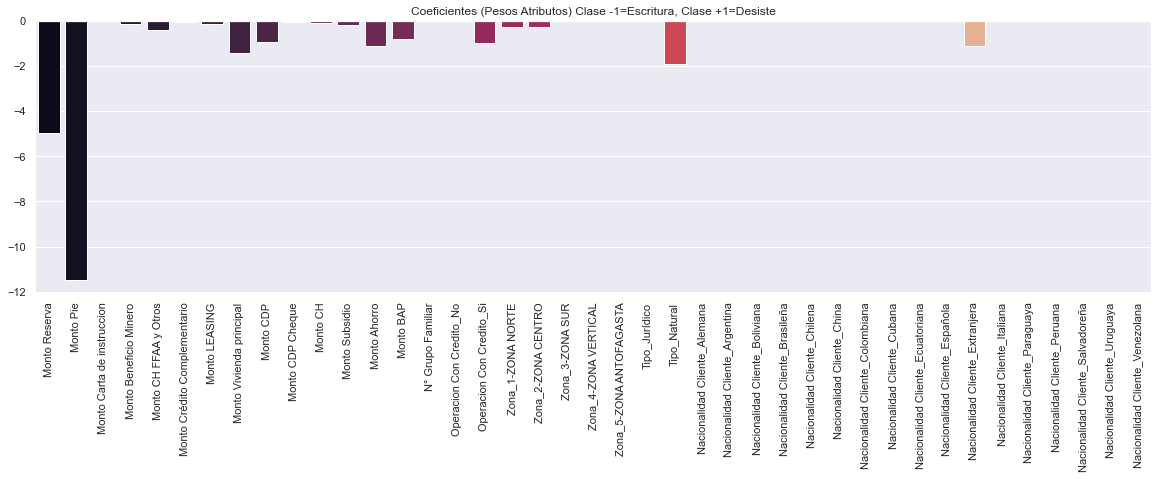

In [237]:
w = best.coef_
b = best.intercept_

class1 = 'Escritura' #-1
class2 = 'Desiste' #+1 -> linea 579 sklearn/linear_model/_stochastic_gradient.py fit_binary(self, 1, X, y, alpha, C,

max_feat = min(len(w[0,:]),41)

fig, ax = plt.subplots(figsize=(20,5),nrows=1)
p = sns.barplot(data= df_prepro, x=np.arange(max_feat), y=w[0,:max_feat], palette="rocket",ax=ax)
ax.set_xticklabels(X.columns[:max_feat])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos) Clase -1=%s, Clase +1=%s'%(class1,class2))
plt.show()

print("")

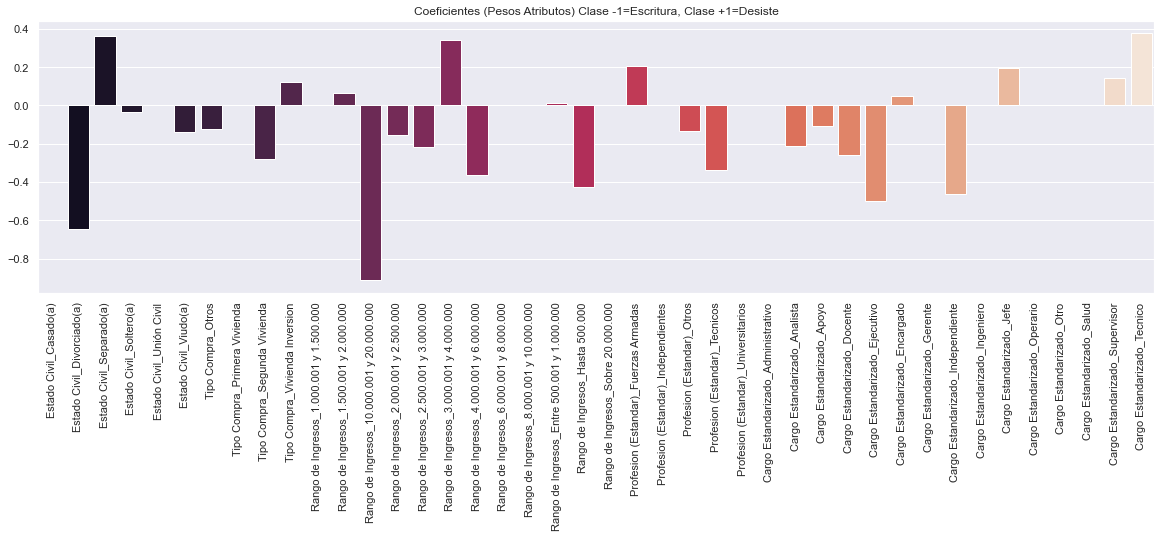

In [238]:
w = best.coef_
b = best.intercept_

class1 = 'Escritura' #-1
class2 = 'Desiste' #+1 -> linea 579 sklearn/linear_model/_stochastic_gradient.py fit_binary(self, 1, X, y, alpha, C,

max_feat = 83

fig, ax = plt.subplots(figsize=(20,5),nrows=1)
p = sns.barplot(data= X_train, x=np.arange(max_feat-41), y=w[0,41:max_feat], palette="rocket",ax=ax)
ax.set_xticklabels(X.columns[41:max_feat])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos) Clase -1=%s, Clase +1=%s'%(class1,class2))
plt.show()

print("")

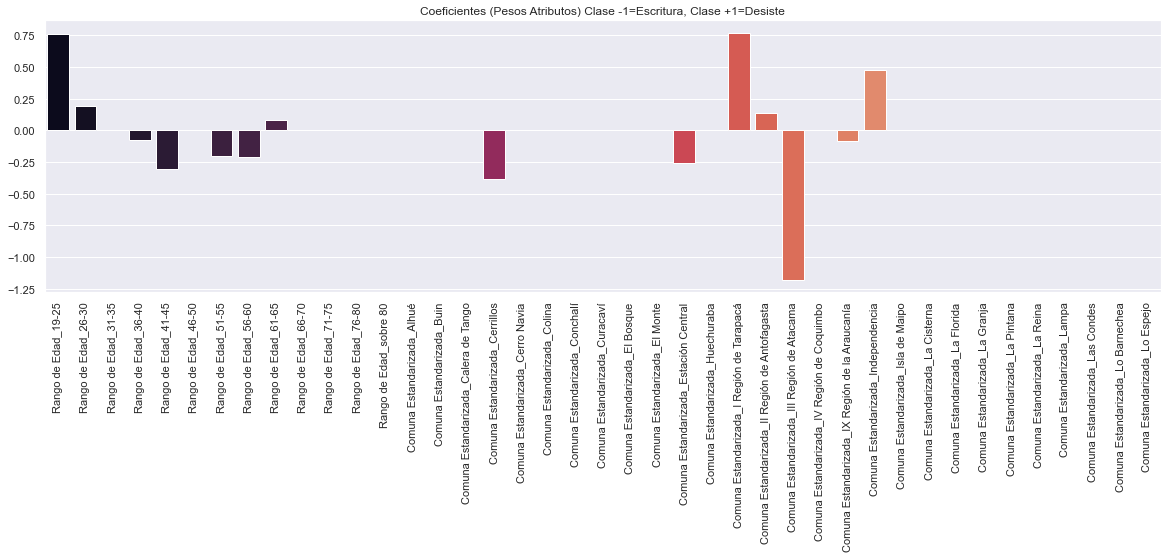

In [239]:
w = best.coef_
b = best.intercept_

class1 = 'Escritura' #-1
class2 = 'Desiste' #+1 -> linea 579 sklearn/linear_model/_stochastic_gradient.py fit_binary(self, 1, X, y, alpha, C,

max_feat = 124

fig, ax = plt.subplots(figsize=(20,5),nrows=1)
p = sns.barplot(data= df_prepro, x=np.arange(max_feat-83), y=w[0,83:max_feat], palette="rocket",ax=ax)
ax.set_xticklabels(X.columns[83:max_feat])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos) Clase -1=%s, Clase +1=%s'%(class1,class2))
plt.show()

print("")

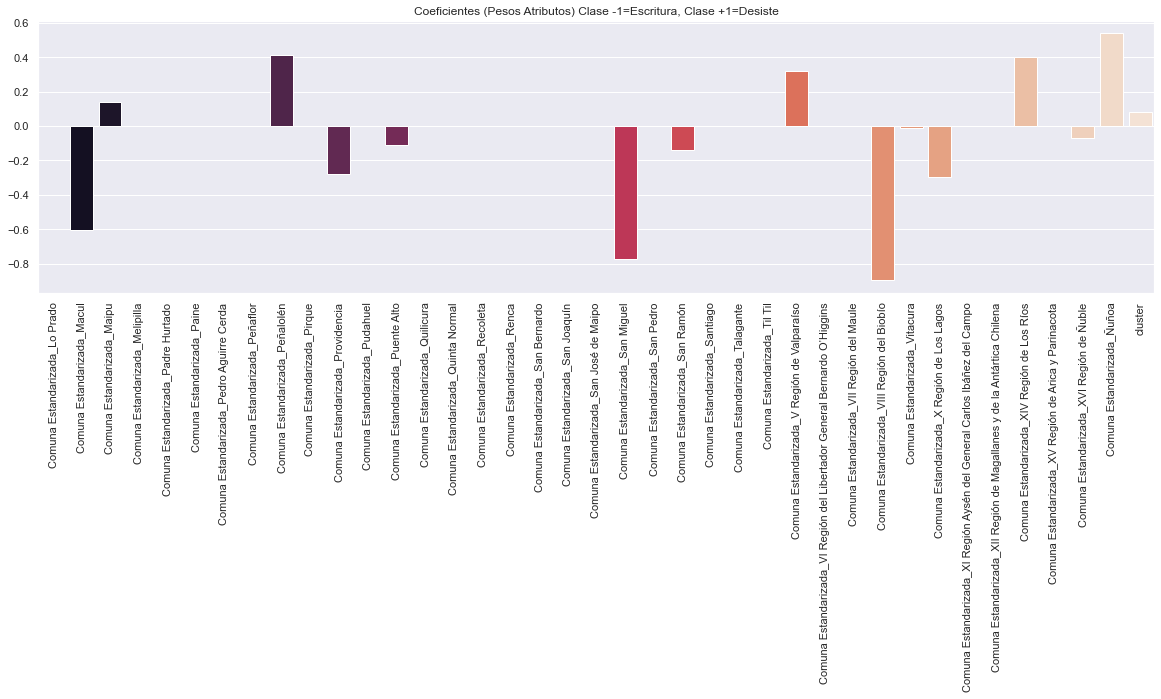

In [240]:
w = best.coef_
b = best.intercept_

class1 = 'Escritura' #-1
class2 = 'Desiste' #+1 -> linea 579 sklearn/linear_model/_stochastic_gradient.py fit_binary(self, 1, X, y, alpha, C,

max_feat = 163

fig, ax = plt.subplots(figsize=(20,5),nrows=1)
p = sns.barplot(data= df_prepro, x=np.arange(max_feat-124), y=w[0,124:max_feat], palette="rocket",ax=ax)
ax.set_xticklabels(X.columns[124:max_feat])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos) Clase -1=%s, Clase +1=%s'%(class1,class2))
plt.show()

print("")